In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import re

In [2]:
# set parameters
np.random.seed(0)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
data_dir = "C:/Users/Filip/Desktop/PW/2 semestr/Deep Learning/pro1"

batch_size = 1
epochs = 15

steps_per_epoch = 90000
steps_per_epoch = min(steps_per_epoch, 90000/batch_size)

In [3]:
x_batch, y_batch = next(train_generator)
print(f"Feature batch shape: {x_batch.shape}")
print(f"Label batch shape: {y_batch.shape}")


NameError: name 'train_generator' is not defined

In [3]:
# create generators for the training and test sets

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    
)
train_generator = datagen.flow_from_directory(
    data_dir + "/train",
    target_size=(32, 32),  # Resize images to this size
    batch_size=64,  # Number of images to load at each iteration
    class_mode="categorical",
)  # Type of classification ('binary' or 'categorical')

test_generator = datagen.flow_from_directory(
    data_dir + "/test",
    target_size=(32, 32),
    batch_size=64,
    class_mode="categorical",
)

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


IndexError: index 1 is out of bounds for axis 0 with size 1

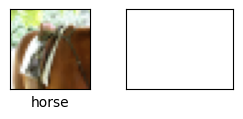

In [4]:
# # check if images are properly loaded
images, labels = next(train_generator)

# Plot the first 16 images of the batch
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    # Assuming 'classes' is a list of class names in the order they are indexed by the generator
    # Decode the one-hot encoded labels to find the class index, then get the class name
    plt.xlabel(classes[labels[i].argmax()])

plt.show()

In [28]:
# create cnn model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))


model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [56]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L2 regularization factor
l2_reg = 0.01  # This is an example value, you might need to tune it

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l2(l2_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [57]:
# fit model
history_1 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 91s 64ms/step - loss: 8.3252 - accuracy: 0.2055 - val_loss: 7.4855 - val_accuracy: 0.3149
Epoch 2/20
1407/1407 [==============================] - 65s 46ms/step - loss: 7.6424 - accuracy: 0.2778 - val_loss: 7.1541 - val_accuracy: 0.3605
Epoch 3/20
1407/1407 [==============================] - 70s 50ms/step - loss: 7.2710 - accuracy: 0.3141 - val_loss: 6.8748 - val_accuracy: 0.3898
Epoch 4/20
1407/1407 [==============================] - 68s 48ms/step - loss: 6.9544 - accuracy: 0.3437 - val_loss: 6.6205 - val_accuracy: 0.4075
Epoch 5/20
1407/1407 [==============================] - 68s 48ms/step - loss: 6.6706 - accuracy: 0.3652 - val_loss: 6.3716 - val_accuracy: 0.4237
Epoch 6/20
1407/1407 [==============================] - 69s 49ms/step - loss: 6.4013 - accuracy: 0.3812 - val_loss: 6.1306 - val_accuracy: 0.4388
Epoch 7/20
1407/1407 [==============================] - 69s 49ms/step - loss: 6.1462 - accuracy: 0.3992 - val_loss: 5.8987 -

In [72]:
history_1

In [58]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L2 regularization factor
l2_reg = 0.001  # This is an example value, you might need to tune it

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l2(l2_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [59]:
# fit model
history_2 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 65s 46ms/step - loss: 3.4201 - accuracy: 0.1981 - val_loss: 2.5253 - val_accuracy: 0.3079
Epoch 2/20
1407/1407 [==============================] - 63s 45ms/step - loss: 2.7883 - accuracy: 0.2772 - val_loss: 2.3533 - val_accuracy: 0.3494
Epoch 3/20
1407/1407 [==============================] - 68s 48ms/step - loss: 2.5905 - accuracy: 0.3110 - val_loss: 2.2689 - val_accuracy: 0.3751
Epoch 4/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.4732 - accuracy: 0.3351 - val_loss: 2.1974 - val_accuracy: 0.3995
Epoch 5/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.3856 - accuracy: 0.3556 - val_loss: 2.1506 - val_accuracy: 0.4163
Epoch 6/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.3100 - accuracy: 0.3781 - val_loss: 2.1130 - val_accuracy: 0.4265
Epoch 7/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.2511 - accuracy: 0.3924 - val_loss: 2.0699 -

In [60]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L2 regularization factor
l2_reg = 0.0001  # This is an example value, you might need to tune it

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l2(l2_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [61]:
# fit model
history_3 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.9086 - accuracy: 0.2010 - val_loss: 2.0154 - val_accuracy: 0.3096
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 2.2959 - accuracy: 0.2771 - val_loss: 1.8425 - val_accuracy: 0.3569
Epoch 3/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.1038 - accuracy: 0.3129 - val_loss: 1.7623 - val_accuracy: 0.3819
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.9754 - accuracy: 0.3375 - val_loss: 1.7022 - val_accuracy: 0.4022
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.8882 - accuracy: 0.3607 - val_loss: 1.6555 - val_accuracy: 0.4175
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.8257 - accuracy: 0.3745 - val_loss: 1.6202 - val_accuracy: 0.4305
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.7690 - accuracy: 0.3908 - val_loss: 1.5865 -

In [62]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L2 regularization factor
l2_reg = 0.00001  # This is an example value, you might need to tune it

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l2(l2_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [63]:
# fit model
history_4 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.8200 - accuracy: 0.1970 - val_loss: 1.9786 - val_accuracy: 0.2997
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 2.2206 - accuracy: 0.2734 - val_loss: 1.8195 - val_accuracy: 0.3415
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.0288 - accuracy: 0.3105 - val_loss: 1.7199 - val_accuracy: 0.3700
Epoch 4/20
1407/1407 [==============================] - 56s 40ms/step - loss: 1.9068 - accuracy: 0.3356 - val_loss: 1.6562 - val_accuracy: 0.3932
Epoch 5/20
1407/1407 [==============================] - 58s 41ms/step - loss: 1.8132 - accuracy: 0.3608 - val_loss: 1.5989 - val_accuracy: 0.4137
Epoch 6/20
1407/1407 [==============================] - 55s 39ms/step - loss: 1.7478 - accuracy: 0.3789 - val_loss: 1.5515 - val_accuracy: 0.4319
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.6922 - accuracy: 0.3971 - val_loss: 1.5188 -

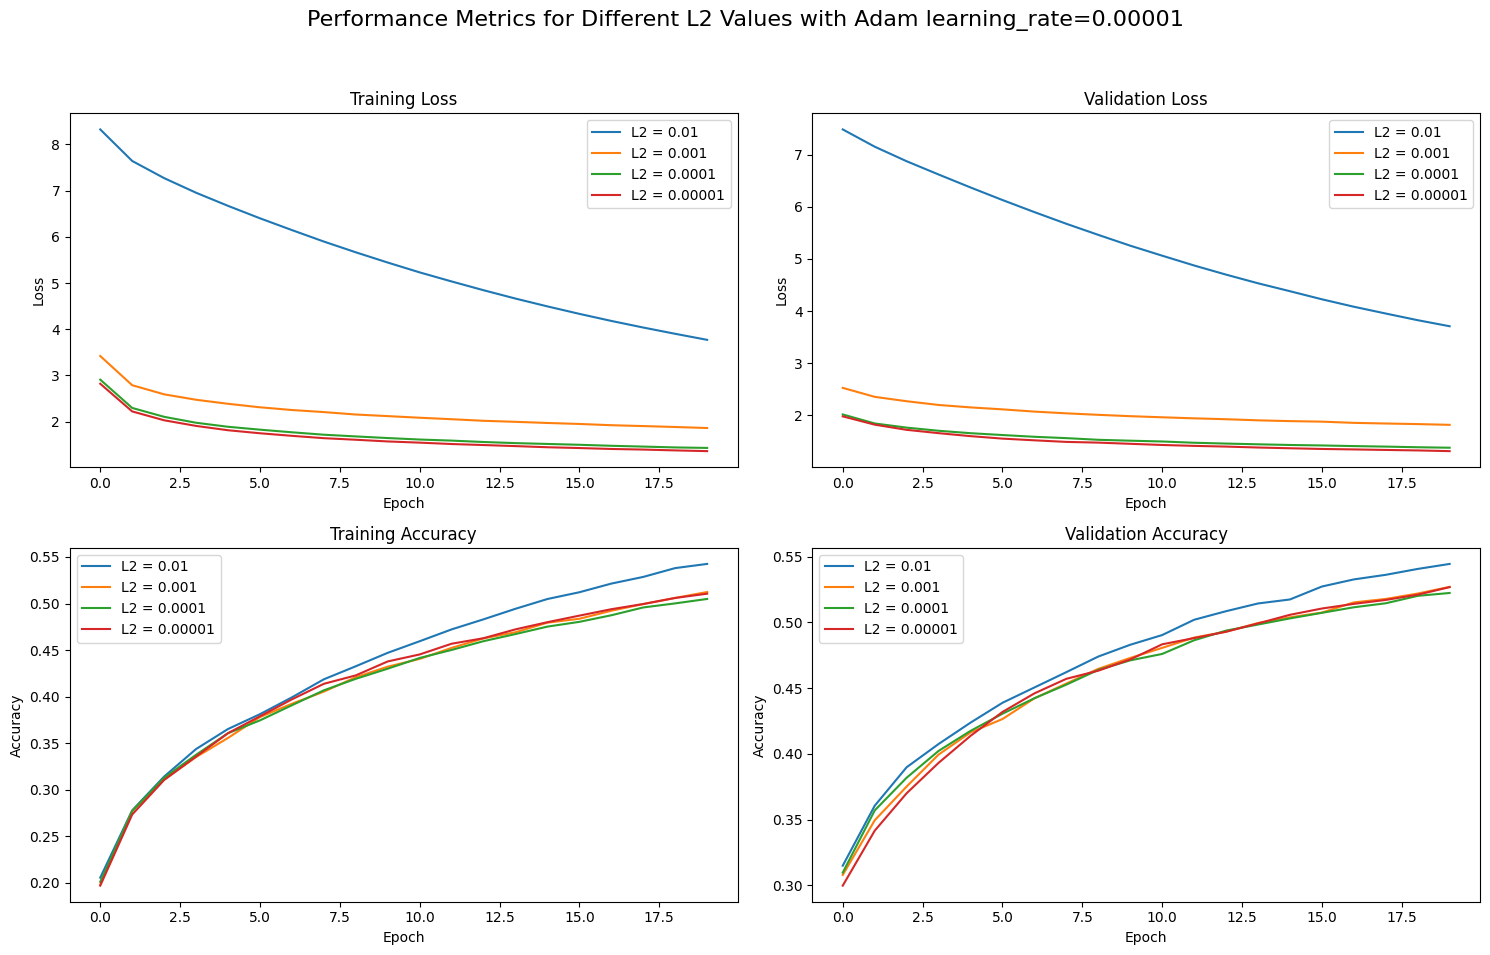

In [68]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting Training Loss
axs[0, 0].plot(history_1.history['loss'], label='L2 = 0.01')
axs[0, 0].plot(history_2.history['loss'], label='L2 = 0.001')
axs[0, 0].plot(history_3.history['loss'], label='L2 = 0.0001')
axs[0, 0].plot(history_4.history['loss'], label='L2 = 0.00001')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plotting Validation Loss
axs[0, 1].plot(history_1.history['val_loss'], label='L2 = 0.01')
axs[0, 1].plot(history_2.history['val_loss'], label='L2 = 0.001')
axs[0, 1].plot(history_3.history['val_loss'], label='L2 = 0.0001')
axs[0, 1].plot(history_4.history['val_loss'], label='L2 = 0.00001')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plotting Training Accuracy
axs[1, 0].plot(history_1.history['accuracy'], label='L2 = 0.01')
axs[1, 0].plot(history_2.history['accuracy'], label='L2 = 0.001')
axs[1, 0].plot(history_3.history['accuracy'], label='L2 = 0.0001')
axs[1, 0].plot(history_4.history['accuracy'], label='L2 = 0.00001')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plotting Validation Accuracy
axs[1, 1].plot(history_1.history['val_accuracy'], label='L2 = 0.01')
axs[1, 1].plot(history_2.history['val_accuracy'], label='L2 = 0.001')
axs[1, 1].plot(history_3.history['val_accuracy'], label='L2 = 0.0001')
axs[1, 1].plot(history_4.history['val_accuracy'], label='L2 = 0.00001')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout and set an overall title
fig.suptitle('Performance Metrics for Different L2 Values with Adam learning_rate=0.00001', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [97]:
# function for auto saving new models
def save_model_with_version(model, accuracy, base_path="models/cnn/"):
    pattern = r"v(\d+)"  # Regex to find version numbers
    max_version = 0
    
    # Check for existing models and find the highest version number
    if not os.path.exists(base_path):
        os.makedirs(base_path)
    for filename in os.listdir(os.path.dirname(base_path)):
        match = re.search(pattern, filename)
        if match:
            version = int(match.group(1))
            max_version = max(max_version, version)
    
    # Increment the version for the new model
    new_version = max_version + 1
    model_path = f"{base_path}cnn_v{new_version}_{round(accuracy,4)}.model"
    
    # Save the model
    model.save(model_path)
    print(f"Model saved as {model_path}")

In [98]:
#evaluate and save model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print(f"Loss: {loss}, Accuracy: {accuracy}")

save_model_with_version(model, accuracy)

1407/1407 [==============================] - 23s 16ms/step - loss: 1.5291 - accuracy: 0.4373
Loss: 1.5291271209716797, Accuracy: 0.4373222291469574
INFO:tensorflow:Assets written to: models/cnn/cnn_v4_0.4373222291469574.model/assets


INFO:tensorflow:Assets written to: models/cnn/cnn_v4_0.4373222291469574.model/assets


Model saved as models/cnn/cnn_v4_0.4373222291469574.model


## L1 regularization

In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 regularization factor
l1_reg = 0.01  # This is an example value, you might need to tune it

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1(l1_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1(l1_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [14]:
# fit model
history_5 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 133.6654 - accuracy: 0.2031 - val_loss: 119.8037 - val_accuracy: 0.3060
Epoch 2/20
1407/1407 [==============================] - 55s 39ms/step - loss: 107.3230 - accuracy: 0.2759 - val_loss: 94.5038 - val_accuracy: 0.3528
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 83.2330 - accuracy: 0.3179 - val_loss: 72.0965 - val_accuracy: 0.3926
Epoch 4/20
1407/1407 [==============================] - 55s 39ms/step - loss: 62.7232 - accuracy: 0.3512 - val_loss: 53.7175 - val_accuracy: 0.4149
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 46.4455 - accuracy: 0.3847 - val_loss: 39.6129 - val_accuracy: 0.4385
Epoch 6/20
1407/1407 [==============================] - 54s 39ms/step - loss: 34.2103 - accuracy: 0.4112 - val_loss: 29.1822 - val_accuracy: 0.4531
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 25.2438 - accuracy: 0.4380 - va

In [15]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 regularization factor
l1_reg = 0.001  # This is an example value, you might need to tune it

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1(l1_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1(l1_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [16]:
# fit model
history_6 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 57s 40ms/step - loss: 16.8769 - accuracy: 0.2074 - val_loss: 15.8639 - val_accuracy: 0.3056
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 15.9047 - accuracy: 0.2763 - val_loss: 15.2624 - val_accuracy: 0.3530
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 15.2429 - accuracy: 0.3150 - val_loss: 14.6981 - val_accuracy: 0.3821
Epoch 4/20
1407/1407 [==============================] - 55s 39ms/step - loss: 14.6287 - accuracy: 0.3450 - val_loss: 14.1384 - val_accuracy: 0.4022
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 14.0421 - accuracy: 0.3657 - val_loss: 13.5878 - val_accuracy: 0.4212
Epoch 6/20
1407/1407 [==============================] - 55s 39ms/step - loss: 13.4719 - accuracy: 0.3845 - val_loss: 13.0464 - val_accuracy: 0.4362
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 12.9107 - accuracy: 0.4021 - val_l

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 regularization factor
l1_reg = 0.0001  # This is an example value, you might need to tune it

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1(l1_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1(l1_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [18]:
# fit model
history_7 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 4.1051 - accuracy: 0.2092 - val_loss: 3.3296 - val_accuracy: 0.3155
Epoch 2/20
1407/1407 [==============================] - 54s 38ms/step - loss: 3.6177 - accuracy: 0.2756 - val_loss: 3.1778 - val_accuracy: 0.3594
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 3.4211 - accuracy: 0.3125 - val_loss: 3.0909 - val_accuracy: 0.3861
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 3.3000 - accuracy: 0.3397 - val_loss: 3.0240 - val_accuracy: 0.4074
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 3.2027 - accuracy: 0.3622 - val_loss: 2.9696 - val_accuracy: 0.4268
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 3.1287 - accuracy: 0.3837 - val_loss: 2.9211 - val_accuracy: 0.4426
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 3.0660 - accuracy: 0.3999 - val_loss: 2.8822 -

In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 regularization factor
l1_reg = 0.00001  # This is an example value, you might need to tune it

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1(l1_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1(l1_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1(l1_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [20]:
# fit model
history_8 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 56s 39ms/step - loss: 2.7522 - accuracy: 0.2143 - val_loss: 2.0391 - val_accuracy: 0.3136
Epoch 2/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.2909 - accuracy: 0.2811 - val_loss: 1.8954 - val_accuracy: 0.3561
Epoch 3/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.1202 - accuracy: 0.3144 - val_loss: 1.8260 - val_accuracy: 0.3765
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 2.0125 - accuracy: 0.3409 - val_loss: 1.7773 - val_accuracy: 0.3948
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.9400 - accuracy: 0.3586 - val_loss: 1.7324 - val_accuracy: 0.4125
Epoch 6/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.8823 - accuracy: 0.3772 - val_loss: 1.7032 - val_accuracy: 0.4238
Epoch 7/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.8269 - accuracy: 0.3923 - val_loss: 1.6730 -

In [49]:
import re

def extract_training_metrics(training_log):
    # Regular expressions for each metric
    loss_pattern = r" - loss: (\d+\.\d+)"
    accuracy_pattern = r" - accuracy: (\d+\.\d+)"
    val_loss_pattern = r"val_loss: (\d+\.\d+)"
    val_accuracy_pattern = r"val_accuracy: (\d+\.\d+)"

    # Extracting all occurrences of each metric
    losses = [float(loss) for loss in re.findall(loss_pattern, training_log)]
    accuracies = [float(acc) for acc in re.findall(accuracy_pattern, training_log)]
    val_losses = [float(val_loss) for val_loss in re.findall(val_loss_pattern, training_log)]
    val_accuracies = [float(val_acc) for val_acc in re.findall(val_accuracy_pattern, training_log)]

    return losses, accuracies, val_losses, val_accuracies

hist5 = """ Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 133.6654 - accuracy: 0.2031 - val_loss: 119.8037 - val_accuracy: 0.3060
Epoch 2/20
1407/1407 [==============================] - 55s 39ms/step - loss: 107.3230 - accuracy: 0.2759 - val_loss: 94.5038 - val_accuracy: 0.3528
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 83.2330 - accuracy: 0.3179 - val_loss: 72.0965 - val_accuracy: 0.3926
Epoch 4/20
1407/1407 [==============================] - 55s 39ms/step - loss: 62.7232 - accuracy: 0.3512 - val_loss: 53.7175 - val_accuracy: 0.4149
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 46.4455 - accuracy: 0.3847 - val_loss: 39.6129 - val_accuracy: 0.4385
Epoch 6/20
1407/1407 [==============================] - 54s 39ms/step - loss: 34.2103 - accuracy: 0.4112 - val_loss: 29.1822 - val_accuracy: 0.4531
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 25.2438 - accuracy: 0.4380 - val_loss: 21.5880 - val_accuracy: 0.4703
Epoch 8/20
1407/1407 [==============================] - 56s 40ms/step - loss: 18.6864 - accuracy: 0.4541 - val_loss: 15.9982 - val_accuracy: 0.4749
Epoch 9/20
1407/1407 [==============================] - 55s 39ms/step - loss: 13.8345 - accuracy: 0.4608 - val_loss: 11.8373 - val_accuracy: 0.4736
Epoch 10/20
1407/1407 [==============================] - 55s 39ms/step - loss: 10.2349 - accuracy: 0.4627 - val_loss: 8.7662 - val_accuracy: 0.4736
Epoch 11/20
1407/1407 [==============================] - 55s 39ms/step - loss: 7.6456 - accuracy: 0.4540 - val_loss: 6.6488 - val_accuracy: 0.4540
Epoch 12/20
1407/1407 [==============================] - 56s 40ms/step - loss: 5.8964 - accuracy: 0.4440 - val_loss: 5.2429 - val_accuracy: 0.4500
Epoch 13/20
1407/1407 [==============================] - 54s 39ms/step - loss: 4.7959 - accuracy: 0.4305 - val_loss: 4.3907 - val_accuracy: 0.4387
Epoch 14/20
1407/1407 [==============================] - 55s 39ms/step - loss: 4.1316 - accuracy: 0.4249 - val_loss: 3.8754 - val_accuracy: 0.4283
Epoch 15/20
1407/1407 [==============================] - 55s 39ms/step - loss: 3.7218 - accuracy: 0.4197 - val_loss: 3.5511 - val_accuracy: 0.4291
Epoch 16/20
1407/1407 [==============================] - 56s 40ms/step - loss: 3.4452 - accuracy: 0.4192 - val_loss: 3.3093 - val_accuracy: 0.4298
Epoch 17/20
1407/1407 [==============================] - 56s 39ms/step - loss: 3.2446 - accuracy: 0.4184 - val_loss: 3.1410 - val_accuracy: 0.4234
Epoch 18/20
1407/1407 [==============================] - 53s 38ms/step - loss: 3.0923 - accuracy: 0.4212 - val_loss: 3.0038 - val_accuracy: 0.4289
Epoch 19/20
1407/1407 [==============================] - 56s 40ms/step - loss: 2.9717 - accuracy: 0.4242 - val_loss: 2.9012 - val_accuracy: 0.4385
Epoch 20/20
1407/1407 [==============================] - 58s 41ms/step - loss: 2.8739 - accuracy: 0.4281 - val_loss: 2.8299 - val_accuracy: 0.4361 """
hist6 = """Epoch 1/20
1407/1407 [==============================] - 57s 40ms/step - loss: 16.8769 - accuracy: 0.2074 - val_loss: 15.8639 - val_accuracy: 0.3056
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 15.9047 - accuracy: 0.2763 - val_loss: 15.2624 - val_accuracy: 0.3530
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 15.2429 - accuracy: 0.3150 - val_loss: 14.6981 - val_accuracy: 0.3821
Epoch 4/20
1407/1407 [==============================] - 55s 39ms/step - loss: 14.6287 - accuracy: 0.3450 - val_loss: 14.1384 - val_accuracy: 0.4022
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 14.0421 - accuracy: 0.3657 - val_loss: 13.5878 - val_accuracy: 0.4212
Epoch 6/20
1407/1407 [==============================] - 55s 39ms/step - loss: 13.4719 - accuracy: 0.3845 - val_loss: 13.0464 - val_accuracy: 0.4362
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 12.9107 - accuracy: 0.4021 - val_loss: 12.5128 - val_accuracy: 0.4504
Epoch 8/20
1407/1407 [==============================] - 56s 40ms/step - loss: 12.3701 - accuracy: 0.4203 - val_loss: 11.9940 - val_accuracy: 0.4657
Epoch 9/20
1407/1407 [==============================] - 55s 39ms/step - loss: 11.8516 - accuracy: 0.4318 - val_loss: 11.4969 - val_accuracy: 0.4771
Epoch 10/20
1407/1407 [==============================] - 56s 40ms/step - loss: 11.3539 - accuracy: 0.4474 - val_loss: 11.0222 - val_accuracy: 0.4841
Epoch 11/20
1407/1407 [==============================] - 55s 39ms/step - loss: 10.8776 - accuracy: 0.4572 - val_loss: 10.5666 - val_accuracy: 0.4929
Epoch 12/20
1407/1407 [==============================] - 54s 38ms/step - loss: 10.4211 - accuracy: 0.4683 - val_loss: 10.1350 - val_accuracy: 0.4962
Epoch 13/20
1407/1407 [==============================] - 54s 38ms/step - loss: 9.9822 - accuracy: 0.4794 - val_loss: 9.7075 - val_accuracy: 0.5088
Epoch 14/20
1407/1407 [==============================] - 55s 39ms/step - loss: 9.5695 - accuracy: 0.4882 - val_loss: 9.3156 - val_accuracy: 0.5128
Epoch 15/20
1407/1407 [==============================] - 54s 38ms/step - loss: 9.1761 - accuracy: 0.4950 - val_loss: 8.9343 - val_accuracy: 0.5186
Epoch 16/20
1407/1407 [==============================] - 55s 39ms/step - loss: 8.7953 - accuracy: 0.5049 - val_loss: 8.5782 - val_accuracy: 0.5221
Epoch 17/20
1407/1407 [==============================] - 55s 39ms/step - loss: 8.4416 - accuracy: 0.5102 - val_loss: 8.2330 - val_accuracy: 0.5298
Epoch 18/20
1407/1407 [==============================] - 54s 38ms/step - loss: 8.1044 - accuracy: 0.5192 - val_loss: 7.9096 - val_accuracy: 0.5324
Epoch 19/20
1407/1407 [==============================] - 53s 38ms/step - loss: 7.7802 - accuracy: 0.5278 - val_loss: 7.6035 - val_accuracy: 0.5376
Epoch 20/20
1407/1407 [==============================] - 53s 38ms/step - loss: 7.4785 - accuracy: 0.5302 - val_loss: 7.3168 - val_accuracy: 0.5405 """
hist7 = """ Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 4.1051 - accuracy: 0.2092 - val_loss: 3.3296 - val_accuracy: 0.3155
Epoch 2/20
1407/1407 [==============================] - 54s 38ms/step - loss: 3.6177 - accuracy: 0.2756 - val_loss: 3.1778 - val_accuracy: 0.3594
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 3.4211 - accuracy: 0.3125 - val_loss: 3.0909 - val_accuracy: 0.3861
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 3.3000 - accuracy: 0.3397 - val_loss: 3.0240 - val_accuracy: 0.4074
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 3.2027 - accuracy: 0.3622 - val_loss: 2.9696 - val_accuracy: 0.4268
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 3.1287 - accuracy: 0.3837 - val_loss: 2.9211 - val_accuracy: 0.4426
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 3.0660 - accuracy: 0.3999 - val_loss: 2.8822 - val_accuracy: 0.4556
Epoch 8/20
1407/1407 [==============================] - 53s 38ms/step - loss: 3.0091 - accuracy: 0.4144 - val_loss: 2.8470 - val_accuracy: 0.4674
Epoch 9/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.9627 - accuracy: 0.4285 - val_loss: 2.8169 - val_accuracy: 0.4754
Epoch 10/20
1407/1407 [==============================] - 53s 38ms/step - loss: 2.9225 - accuracy: 0.4404 - val_loss: 2.7887 - val_accuracy: 0.4822
Epoch 11/20
1407/1407 [==============================] - 53s 38ms/step - loss: 2.8854 - accuracy: 0.4505 - val_loss: 2.7617 - val_accuracy: 0.4889
Epoch 12/20
1407/1407 [==============================] - 54s 39ms/step - loss: 2.8482 - accuracy: 0.4619 - val_loss: 2.7411 - val_accuracy: 0.4933
Epoch 13/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.8170 - accuracy: 0.4673 - val_loss: 2.7142 - val_accuracy: 0.5008
Epoch 14/20
1407/1407 [==============================] - 54s 39ms/step - loss: 2.7845 - accuracy: 0.4772 - val_loss: 2.6919 - val_accuracy: 0.5065
Epoch 15/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.7557 - accuracy: 0.4828 - val_loss: 2.6796 - val_accuracy: 0.5079
Epoch 16/20
1407/1407 [==============================] - 53s 38ms/step - loss: 2.7253 - accuracy: 0.4944 - val_loss: 2.6503 - val_accuracy: 0.5177
Epoch 17/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.6965 - accuracy: 0.5005 - val_loss: 2.6300 - val_accuracy: 0.5206
Epoch 18/20
1407/1407 [==============================] - 53s 38ms/step - loss: 2.6804 - accuracy: 0.5041 - val_loss: 2.6129 - val_accuracy: 0.5240
Epoch 19/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.6554 - accuracy: 0.5097 - val_loss: 2.6032 - val_accuracy: 0.5248
Epoch 20/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.6247 - accuracy: 0.5183 - val_loss: 2.5797 - val_accuracy: 0.5331 """
hist8 = """ Epoch 1/20
1407/1407 [==============================] - 56s 39ms/step - loss: 2.7522 - accuracy: 0.2143 - val_loss: 2.0391 - val_accuracy: 0.3136
Epoch 2/20
1407/1407 [==============================] - 54s 38ms/step - loss: 2.2909 - accuracy: 0.2811 - val_loss: 1.8954 - val_accuracy: 0.3561
Epoch 3/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.1202 - accuracy: 0.3144 - val_loss: 1.8260 - val_accuracy: 0.3765
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 2.0125 - accuracy: 0.3409 - val_loss: 1.7773 - val_accuracy: 0.3948
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.9400 - accuracy: 0.3586 - val_loss: 1.7324 - val_accuracy: 0.4125
Epoch 6/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.8823 - accuracy: 0.3772 - val_loss: 1.7032 - val_accuracy: 0.4238
Epoch 7/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.8269 - accuracy: 0.3923 - val_loss: 1.6730 - val_accuracy: 0.4373
Epoch 8/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.7852 - accuracy: 0.4065 - val_loss: 1.6470 - val_accuracy: 0.4493
Epoch 9/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.7480 - accuracy: 0.4174 - val_loss: 1.6213 - val_accuracy: 0.4594
Epoch 10/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.7100 - accuracy: 0.4323 - val_loss: 1.5969 - val_accuracy: 0.4694
Epoch 11/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.6796 - accuracy: 0.4422 - val_loss: 1.5761 - val_accuracy: 0.4779
Epoch 12/20
1407/1407 [==============================] - 55s 39ms/step - loss: 1.6504 - accuracy: 0.4526 - val_loss: 1.5589 - val_accuracy: 0.4836
Epoch 13/20
1407/1407 [==============================] - 54s 39ms/step - loss: 1.6256 - accuracy: 0.4631 - val_loss: 1.5420 - val_accuracy: 0.4908
Epoch 14/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.6095 - accuracy: 0.4707 - val_loss: 1.5274 - val_accuracy: 0.4964
Epoch 15/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.5842 - accuracy: 0.4777 - val_loss: 1.5159 - val_accuracy: 0.5001
Epoch 16/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.5607 - accuracy: 0.4843 - val_loss: 1.5003 - val_accuracy: 0.5078
Epoch 17/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.5409 - accuracy: 0.4922 - val_loss: 1.4876 - val_accuracy: 0.5118
Epoch 18/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.5242 - accuracy: 0.4979 - val_loss: 1.4790 - val_accuracy: 0.5151
Epoch 19/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.5092 - accuracy: 0.5037 - val_loss: 1.4673 - val_accuracy: 0.5201
Epoch 20/20
1407/1407 [==============================] - 55s 39ms/step - loss: 1.4946 - accuracy: 0.5101 - val_loss: 1.4529 - val_accuracy: 0.5251 """


In [50]:
losses_5, accuracies_5, val_losses_5, val_accuracies_5 = extract_training_metrics(hist5)
losses_6, accuracies_6, val_losses_6, val_accuracies_6 = extract_training_metrics(hist6)
losses_7, accuracies_7, val_losses_7, val_accuracies_7 = extract_training_metrics(hist7)
losses_8, accuracies_8, val_losses_8, val_accuracies_8 = extract_training_metrics(hist8)

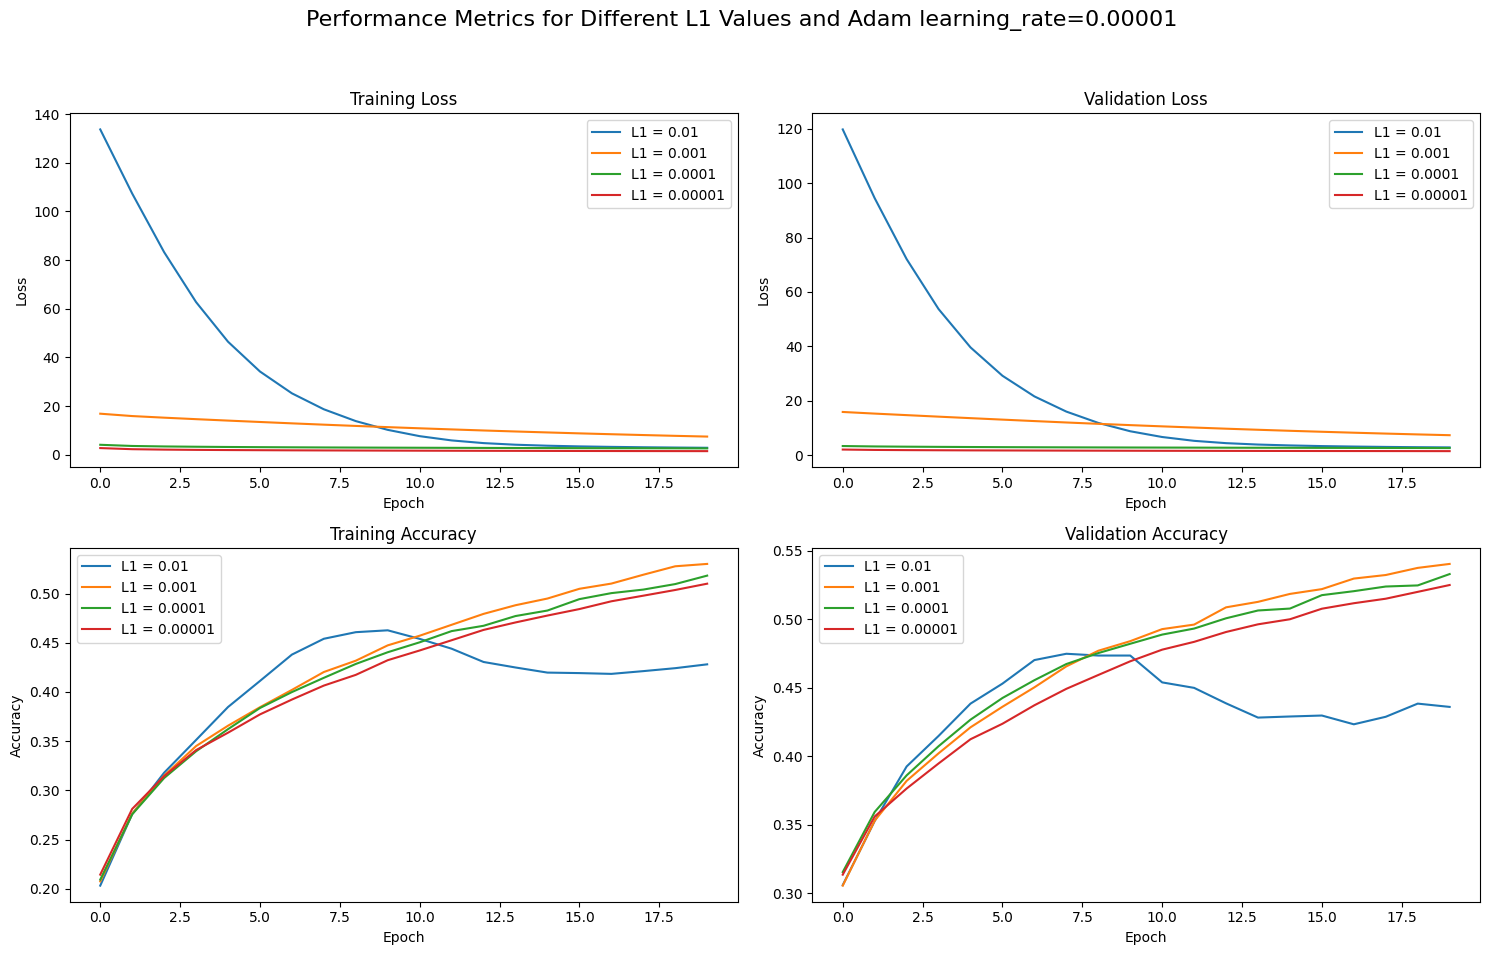

In [75]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting Training Loss
axs[0, 0].plot(losses_5, label='L1 = 0.01')
axs[0, 0].plot(losses_6, label='L1 = 0.001')
axs[0, 0].plot(losses_7, label='L1 = 0.0001')
axs[0, 0].plot(losses_8, label='L1 = 0.00001')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plotting Validation Loss
axs[0, 1].plot(val_losses_5, label='L1 = 0.01')
axs[0, 1].plot(val_losses_6, label='L1 = 0.001')
axs[0, 1].plot(val_losses_7, label='L1 = 0.0001')
axs[0, 1].plot(val_losses_8, label='L1 = 0.00001')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plotting Training Accuracy
axs[1, 0].plot(accuracies_5, label='L1 = 0.01')
axs[1, 0].plot(accuracies_6, label='L1 = 0.001')
axs[1, 0].plot(accuracies_7, label='L1 = 0.0001')
axs[1, 0].plot(accuracies_8, label='L1 = 0.00001')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plotting Validation Accuracy
axs[1, 1].plot(val_accuracies_5, label='L1 = 0.01')
axs[1, 1].plot(val_accuracies_6, label='L1 = 0.001')
axs[1, 1].plot(val_accuracies_7, label='L1 = 0.0001')
axs[1, 1].plot(val_accuracies_8, label='L1 = 0.00001')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout and set an overall title
fig.suptitle('Performance Metrics for Different L1 Values and Adam learning_rate=0.00001 ', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


## SGD

### Nesterov

In [21]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [22]:
# fit model
history_9 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.7597 - accuracy: 0.3621 - val_loss: 1.6456 - val_accuracy: 0.3960
Epoch 2/20
1407/1407 [==============================] - 54s 39ms/step - loss: 1.4505 - accuracy: 0.4673 - val_loss: 1.5332 - val_accuracy: 0.4560
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.3269 - accuracy: 0.5180 - val_loss: 1.6185 - val_accuracy: 0.4320
Epoch 4/20
1407/1407 [==============================] - 54s 39ms/step - loss: 1.2402 - accuracy: 0.5523 - val_loss: 1.3517 - val_accuracy: 0.5141
Epoch 5/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1720 - accuracy: 0.5767 - val_loss: 1.4895 - val_accuracy: 0.4778
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1113 - accuracy: 0.5973 - val_loss: 1.1837 - val_accuracy: 0.5769
Epoch 7/20
1407/1407 [==============================] - 57s 41ms/step - loss: 1.0628 - accuracy: 0.6173 - val_loss: 1.2431 -

In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.6, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [24]:
# fit model
history_10 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.7153 - accuracy: 0.3745 - val_loss: 1.7979 - val_accuracy: 0.3551
Epoch 2/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.4164 - accuracy: 0.4818 - val_loss: 1.7967 - val_accuracy: 0.3988
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2976 - accuracy: 0.5297 - val_loss: 2.1166 - val_accuracy: 0.3737
Epoch 4/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2190 - accuracy: 0.5607 - val_loss: 1.3162 - val_accuracy: 0.5306
Epoch 5/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1543 - accuracy: 0.5833 - val_loss: 1.3668 - val_accuracy: 0.4999
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0985 - accuracy: 0.6058 - val_loss: 1.1183 - val_accuracy: 0.5982
Epoch 7/20
1407/1407 [==============================] - 54s 39ms/step - loss: 1.0566 - accuracy: 0.6205 - val_loss: 1.1533 -

In [25]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.7, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [26]:
# fit model
history_11 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.7045 - accuracy: 0.3796 - val_loss: 1.6696 - val_accuracy: 0.3828
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.4005 - accuracy: 0.4893 - val_loss: 1.6553 - val_accuracy: 0.4325
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2764 - accuracy: 0.5373 - val_loss: 1.4341 - val_accuracy: 0.4728
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1965 - accuracy: 0.5679 - val_loss: 1.3477 - val_accuracy: 0.5259
Epoch 5/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1290 - accuracy: 0.5933 - val_loss: 1.2806 - val_accuracy: 0.5384
Epoch 6/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.0713 - accuracy: 0.6152 - val_loss: 1.3638 - val_accuracy: 0.5242
Epoch 7/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.0241 - accuracy: 0.6326 - val_loss: 1.1737 -

In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.8, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [28]:
# fit model
history_12 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.6769 - accuracy: 0.3874 - val_loss: 1.7479 - val_accuracy: 0.3683
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.3790 - accuracy: 0.4975 - val_loss: 1.8524 - val_accuracy: 0.3709
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2543 - accuracy: 0.5458 - val_loss: 1.4030 - val_accuracy: 0.4973
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1659 - accuracy: 0.5781 - val_loss: 1.3507 - val_accuracy: 0.5155
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.0949 - accuracy: 0.6072 - val_loss: 1.1168 - val_accuracy: 0.5975
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0369 - accuracy: 0.6281 - val_loss: 1.2389 - val_accuracy: 0.5698
Epoch 7/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9898 - accuracy: 0.6470 - val_loss: 1.1410 -

In [29]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [30]:
# fit model
history_13 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.6551 - accuracy: 0.3923 - val_loss: 1.7123 - val_accuracy: 0.3734
Epoch 2/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.3639 - accuracy: 0.5029 - val_loss: 1.5975 - val_accuracy: 0.4259
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2394 - accuracy: 0.5538 - val_loss: 1.2873 - val_accuracy: 0.5391
Epoch 4/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.1515 - accuracy: 0.5901 - val_loss: 1.1847 - val_accuracy: 0.5806
Epoch 5/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0816 - accuracy: 0.6138 - val_loss: 1.2500 - val_accuracy: 0.5480
Epoch 6/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.0209 - accuracy: 0.6373 - val_loss: 1.2266 - val_accuracy: 0.5682
Epoch 7/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9652 - accuracy: 0.6576 - val_loss: 1.2321 -

In [53]:
hist9 = """ Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.7597 - accuracy: 0.3621 - val_loss: 1.6456 - val_accuracy: 0.3960
Epoch 2/20
1407/1407 [==============================] - 54s 39ms/step - loss: 1.4505 - accuracy: 0.4673 - val_loss: 1.5332 - val_accuracy: 0.4560
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.3269 - accuracy: 0.5180 - val_loss: 1.6185 - val_accuracy: 0.4320
Epoch 4/20
1407/1407 [==============================] - 54s 39ms/step - loss: 1.2402 - accuracy: 0.5523 - val_loss: 1.3517 - val_accuracy: 0.5141
Epoch 5/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1720 - accuracy: 0.5767 - val_loss: 1.4895 - val_accuracy: 0.4778
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1113 - accuracy: 0.5973 - val_loss: 1.1837 - val_accuracy: 0.5769
Epoch 7/20
1407/1407 [==============================] - 57s 41ms/step - loss: 1.0628 - accuracy: 0.6173 - val_loss: 1.2431 - val_accuracy: 0.5679
Epoch 8/20
1407/1407 [==============================] - 55s 39ms/step - loss: 1.0203 - accuracy: 0.6360 - val_loss: 1.1206 - val_accuracy: 0.5997
Epoch 9/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9778 - accuracy: 0.6490 - val_loss: 1.2408 - val_accuracy: 0.5604
Epoch 10/20
1407/1407 [==============================] - 54s 39ms/step - loss: 0.9424 - accuracy: 0.6624 - val_loss: 1.0557 - val_accuracy: 0.6268
Epoch 11/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.9048 - accuracy: 0.6767 - val_loss: 1.0663 - val_accuracy: 0.6228
Epoch 12/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8736 - accuracy: 0.6880 - val_loss: 1.1393 - val_accuracy: 0.5984
Epoch 13/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8354 - accuracy: 0.7025 - val_loss: 1.0294 - val_accuracy: 0.6360
Epoch 14/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.8097 - accuracy: 0.7102 - val_loss: 1.1504 - val_accuracy: 0.6097
Epoch 15/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7777 - accuracy: 0.7225 - val_loss: 1.3192 - val_accuracy: 0.5718
Epoch 16/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.7510 - accuracy: 0.7327 - val_loss: 1.3005 - val_accuracy: 0.5858
Epoch 17/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7209 - accuracy: 0.7426 - val_loss: 1.0642 - val_accuracy: 0.6401
Epoch 18/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.6923 - accuracy: 0.7528 - val_loss: 1.0723 - val_accuracy: 0.6416
Epoch 19/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.6679 - accuracy: 0.7607 - val_loss: 1.1219 - val_accuracy: 0.6258
Epoch 20/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.6426 - accuracy: 0.7707 - val_loss: 1.1559 - val_accuracy: 0.6213 """
hist10 = """ Epoch 1/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.7153 - accuracy: 0.3745 - val_loss: 1.7979 - val_accuracy: 0.3551
Epoch 2/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.4164 - accuracy: 0.4818 - val_loss: 1.7967 - val_accuracy: 0.3988
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2976 - accuracy: 0.5297 - val_loss: 2.1166 - val_accuracy: 0.3737
Epoch 4/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2190 - accuracy: 0.5607 - val_loss: 1.3162 - val_accuracy: 0.5306
Epoch 5/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1543 - accuracy: 0.5833 - val_loss: 1.3668 - val_accuracy: 0.4999
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0985 - accuracy: 0.6058 - val_loss: 1.1183 - val_accuracy: 0.5982
Epoch 7/20
1407/1407 [==============================] - 54s 39ms/step - loss: 1.0566 - accuracy: 0.6205 - val_loss: 1.1533 - val_accuracy: 0.5879
Epoch 8/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.0108 - accuracy: 0.6367 - val_loss: 1.1938 - val_accuracy: 0.5657
Epoch 9/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9733 - accuracy: 0.6507 - val_loss: 1.1962 - val_accuracy: 0.5842
Epoch 10/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9356 - accuracy: 0.6658 - val_loss: 1.1355 - val_accuracy: 0.5996
Epoch 11/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9016 - accuracy: 0.6780 - val_loss: 1.1254 - val_accuracy: 0.6019
Epoch 12/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.8679 - accuracy: 0.6907 - val_loss: 1.1024 - val_accuracy: 0.6132
Epoch 13/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8375 - accuracy: 0.7012 - val_loss: 1.2192 - val_accuracy: 0.5793
Epoch 14/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8037 - accuracy: 0.7130 - val_loss: 1.1780 - val_accuracy: 0.5941
Epoch 15/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.7734 - accuracy: 0.7235 - val_loss: 1.0759 - val_accuracy: 0.6326
Epoch 16/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.7479 - accuracy: 0.7340 - val_loss: 1.1311 - val_accuracy: 0.6116
Epoch 17/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.7190 - accuracy: 0.7442 - val_loss: 1.3177 - val_accuracy: 0.5687
Epoch 18/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.6949 - accuracy: 0.7528 - val_loss: 1.0762 - val_accuracy: 0.6329
Epoch 19/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.6713 - accuracy: 0.7606 - val_loss: 1.1650 - val_accuracy: 0.6150
Epoch 20/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.6403 - accuracy: 0.7713 - val_loss: 1.1605 - val_accuracy: 0.6203 """
hist11 = """Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.7045 - accuracy: 0.3796 - val_loss: 1.6696 - val_accuracy: 0.3828
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.4005 - accuracy: 0.4893 - val_loss: 1.6553 - val_accuracy: 0.4325
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2764 - accuracy: 0.5373 - val_loss: 1.4341 - val_accuracy: 0.4728
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1965 - accuracy: 0.5679 - val_loss: 1.3477 - val_accuracy: 0.5259
Epoch 5/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1290 - accuracy: 0.5933 - val_loss: 1.2806 - val_accuracy: 0.5384
Epoch 6/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.0713 - accuracy: 0.6152 - val_loss: 1.3638 - val_accuracy: 0.5242
Epoch 7/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.0241 - accuracy: 0.6326 - val_loss: 1.1737 - val_accuracy: 0.5808
Epoch 8/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9794 - accuracy: 0.6496 - val_loss: 1.2347 - val_accuracy: 0.5653
Epoch 9/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.9388 - accuracy: 0.6642 - val_loss: 1.0975 - val_accuracy: 0.6071
Epoch 10/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.8996 - accuracy: 0.6787 - val_loss: 1.1067 - val_accuracy: 0.6145
Epoch 11/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8645 - accuracy: 0.6926 - val_loss: 1.1515 - val_accuracy: 0.6063
Epoch 12/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8300 - accuracy: 0.7038 - val_loss: 1.0754 - val_accuracy: 0.6269
Epoch 13/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7973 - accuracy: 0.7145 - val_loss: 1.0905 - val_accuracy: 0.6277
Epoch 14/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.7721 - accuracy: 0.7259 - val_loss: 1.1481 - val_accuracy: 0.6048
Epoch 15/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.7355 - accuracy: 0.7372 - val_loss: 1.1020 - val_accuracy: 0.6271
Epoch 16/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7118 - accuracy: 0.7468 - val_loss: 1.0967 - val_accuracy: 0.6314
Epoch 17/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.6824 - accuracy: 0.7564 - val_loss: 1.0994 - val_accuracy: 0.6297
Epoch 18/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.6573 - accuracy: 0.7649 - val_loss: 1.1044 - val_accuracy: 0.6332
Epoch 19/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.6321 - accuracy: 0.7748 - val_loss: 1.1017 - val_accuracy: 0.6371
Epoch 20/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.6069 - accuracy: 0.7830 - val_loss: 1.1193 - val_accuracy: 0.6403 """
hist12 = """ Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.6769 - accuracy: 0.3874 - val_loss: 1.7479 - val_accuracy: 0.3683
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.3790 - accuracy: 0.4975 - val_loss: 1.8524 - val_accuracy: 0.3709
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2543 - accuracy: 0.5458 - val_loss: 1.4030 - val_accuracy: 0.4973
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1659 - accuracy: 0.5781 - val_loss: 1.3507 - val_accuracy: 0.5155
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.0949 - accuracy: 0.6072 - val_loss: 1.1168 - val_accuracy: 0.5975
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0369 - accuracy: 0.6281 - val_loss: 1.2389 - val_accuracy: 0.5698
Epoch 7/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9898 - accuracy: 0.6470 - val_loss: 1.1410 - val_accuracy: 0.5949
Epoch 8/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.9428 - accuracy: 0.6639 - val_loss: 1.1224 - val_accuracy: 0.6074
Epoch 9/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.9001 - accuracy: 0.6805 - val_loss: 1.2696 - val_accuracy: 0.5683
Epoch 10/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8616 - accuracy: 0.6932 - val_loss: 1.2339 - val_accuracy: 0.5740
Epoch 11/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.8267 - accuracy: 0.7065 - val_loss: 1.1022 - val_accuracy: 0.6170
Epoch 12/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7935 - accuracy: 0.7163 - val_loss: 1.0699 - val_accuracy: 0.6319
Epoch 13/20
1407/1407 [==============================] - 54s 39ms/step - loss: 0.7570 - accuracy: 0.7310 - val_loss: 1.1871 - val_accuracy: 0.5952
Epoch 14/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.7286 - accuracy: 0.7414 - val_loss: 1.1078 - val_accuracy: 0.6248
Epoch 15/20
1407/1407 [==============================] - 56s 40ms/step - loss: 0.6994 - accuracy: 0.7505 - val_loss: 1.2803 - val_accuracy: 0.5893
Epoch 16/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.6716 - accuracy: 0.7621 - val_loss: 1.2756 - val_accuracy: 0.5833
Epoch 17/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.6462 - accuracy: 0.7701 - val_loss: 1.0919 - val_accuracy: 0.6400
Epoch 18/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.6185 - accuracy: 0.7792 - val_loss: 1.1937 - val_accuracy: 0.6110
Epoch 19/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.5931 - accuracy: 0.7892 - val_loss: 1.2828 - val_accuracy: 0.6105
Epoch 20/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.5719 - accuracy: 0.7962 - val_loss: 1.1110 - val_accuracy: 0.6464 """
hist13 = """Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.6551 - accuracy: 0.3923 - val_loss: 1.7123 - val_accuracy: 0.3734
Epoch 2/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.3639 - accuracy: 0.5029 - val_loss: 1.5975 - val_accuracy: 0.4259
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2394 - accuracy: 0.5538 - val_loss: 1.2873 - val_accuracy: 0.5391
Epoch 4/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.1515 - accuracy: 0.5901 - val_loss: 1.1847 - val_accuracy: 0.5806
Epoch 5/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0816 - accuracy: 0.6138 - val_loss: 1.2500 - val_accuracy: 0.5480
Epoch 6/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.0209 - accuracy: 0.6373 - val_loss: 1.2266 - val_accuracy: 0.5682
Epoch 7/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9652 - accuracy: 0.6576 - val_loss: 1.2321 - val_accuracy: 0.5745
Epoch 8/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.9216 - accuracy: 0.6740 - val_loss: 1.0414 - val_accuracy: 0.6330
Epoch 9/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.8782 - accuracy: 0.6878 - val_loss: 1.0492 - val_accuracy: 0.6312
Epoch 10/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8432 - accuracy: 0.7017 - val_loss: 1.1316 - val_accuracy: 0.6180
Epoch 11/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.8028 - accuracy: 0.7165 - val_loss: 1.0898 - val_accuracy: 0.6235
Epoch 12/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7707 - accuracy: 0.7275 - val_loss: 1.0945 - val_accuracy: 0.6192
Epoch 13/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7413 - accuracy: 0.7352 - val_loss: 1.1225 - val_accuracy: 0.6230
Epoch 14/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.7049 - accuracy: 0.7501 - val_loss: 1.1199 - val_accuracy: 0.6157
Epoch 15/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.6804 - accuracy: 0.7586 - val_loss: 1.3303 - val_accuracy: 0.5774
Epoch 16/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.6461 - accuracy: 0.7709 - val_loss: 1.0566 - val_accuracy: 0.6510
Epoch 17/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.6222 - accuracy: 0.7786 - val_loss: 1.1469 - val_accuracy: 0.6308
Epoch 18/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.5915 - accuracy: 0.7905 - val_loss: 1.1022 - val_accuracy: 0.6369
Epoch 19/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.5712 - accuracy: 0.7970 - val_loss: 1.0591 - val_accuracy: 0.6567
Epoch 20/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.5419 - accuracy: 0.8087 - val_loss: 1.1566 - val_accuracy: 0.6391 """

In [54]:
losses_9, accuracies_9, val_losses_9, val_accuracies_9 = extract_training_metrics(hist9)
losses_10, accuracies_10, val_losses_10, val_accuracies_10 = extract_training_metrics(hist10)
losses_11, accuracies_11, val_losses_11, val_accuracies_11 = extract_training_metrics(hist11)
losses_12, accuracies_12, val_losses_12, val_accuracies_12 = extract_training_metrics(hist12)
losses_13, accuracies_13, val_losses_13, val_accuracies_13 = extract_training_metrics(hist13)


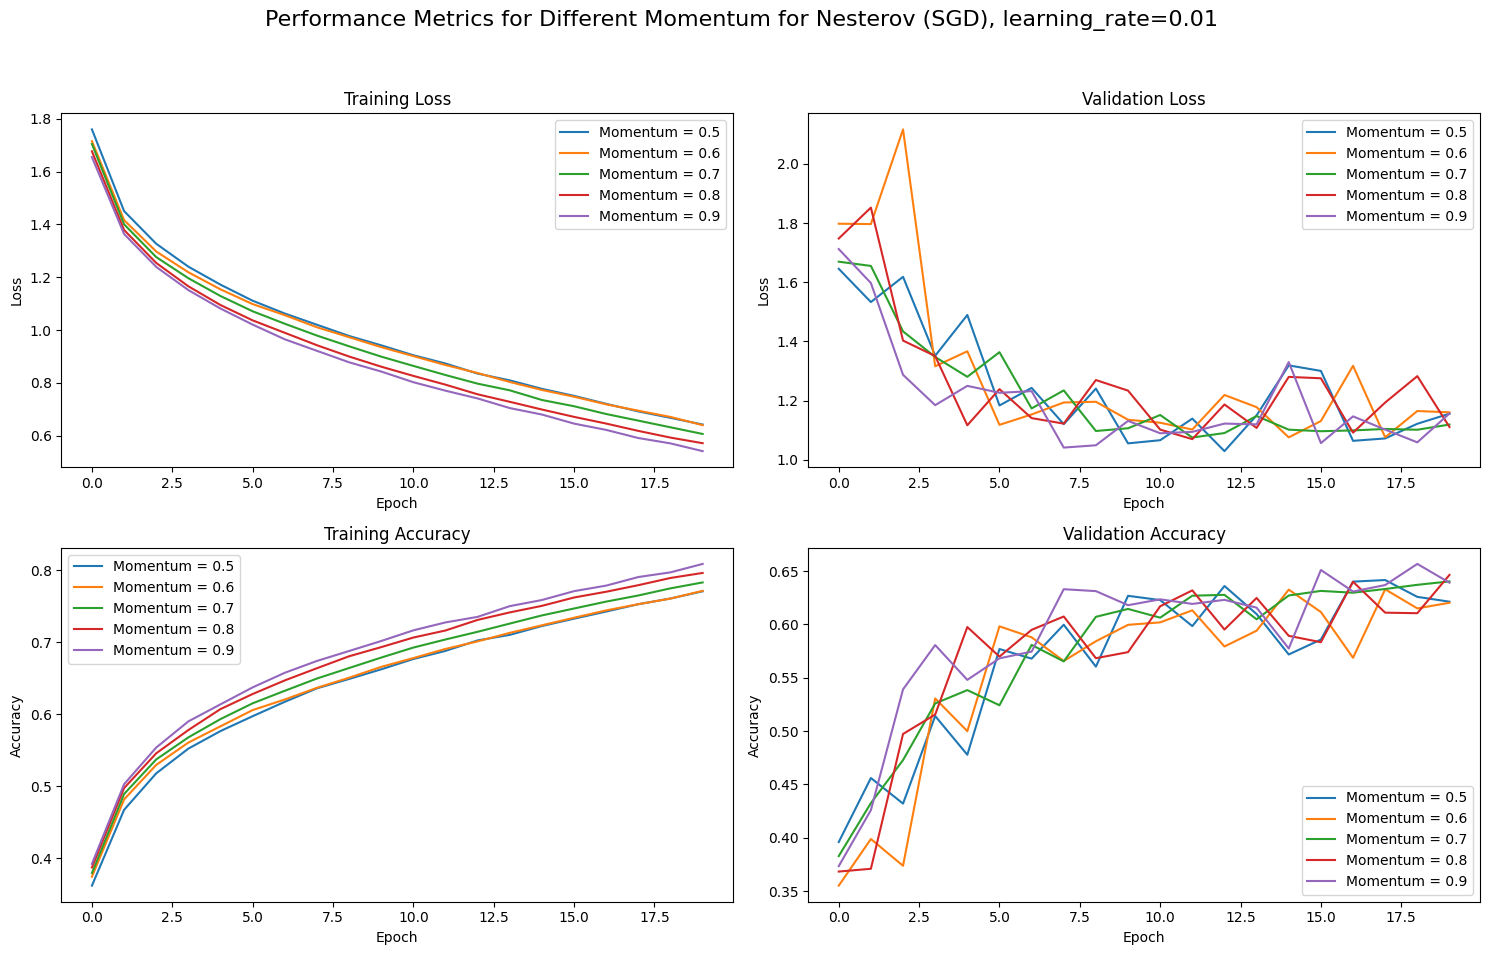

In [74]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting Training Loss
axs[0, 0].plot(losses_9, label='Momentum = 0.5')
axs[0, 0].plot(losses_10, label='Momentum = 0.6')
axs[0, 0].plot(losses_11, label='Momentum = 0.7')
axs[0, 0].plot(losses_12, label='Momentum = 0.8')
axs[0, 0].plot(losses_13, label='Momentum = 0.9')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plotting Validation Loss
axs[0, 1].plot(val_losses_9, label='Momentum = 0.5')
axs[0, 1].plot(val_losses_10, label='Momentum = 0.6')
axs[0, 1].plot(val_losses_11, label='Momentum = 0.7')
axs[0, 1].plot(val_losses_12, label='Momentum = 0.8')
axs[0, 1].plot(val_losses_13, label='Momentum = 0.9')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plotting Training Accuracy
axs[1, 0].plot(accuracies_9, label='Momentum = 0.5')
axs[1, 0].plot(accuracies_10, label='Momentum = 0.6')
axs[1, 0].plot(accuracies_11, label='Momentum = 0.7')
axs[1, 0].plot(accuracies_12, label='Momentum = 0.8')
axs[1, 0].plot(accuracies_13, label='Momentum = 0.9')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plotting Validation Accuracy
axs[1, 1].plot(val_accuracies_9, label='Momentum = 0.5')
axs[1, 1].plot(val_accuracies_10, label='Momentum = 0.6')
axs[1, 1].plot(val_accuracies_11, label='Momentum = 0.7')
axs[1, 1].plot(val_accuracies_12, label='Momentum = 0.8')
axs[1, 1].plot(val_accuracies_13, label='Momentum = 0.9')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout and set an overall title
fig.suptitle('Performance Metrics for Different Momentum for Nesterov (SGD), learning_rate=0.01 ', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


### Not Nesterov

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [5]:
# fit model
history_14 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 130s 85ms/step - loss: 1.7361 - accuracy: 0.3718 - val_loss: 1.6076 - val_accuracy: 0.4177
Epoch 2/20
1407/1407 [==============================] - 105s 75ms/step - loss: 1.4284 - accuracy: 0.4777 - val_loss: 1.9368 - val_accuracy: 0.3356
Epoch 3/20
1407/1407 [==============================] - 104s 74ms/step - loss: 1.3093 - accuracy: 0.5248 - val_loss: 1.3089 - val_accuracy: 0.5240
Epoch 4/20
1407/1407 [==============================] - 59s 42ms/step - loss: 1.2296 - accuracy: 0.5535 - val_loss: 1.2693 - val_accuracy: 0.5373
Epoch 5/20
1407/1407 [==============================] - 55s 39ms/step - loss: 1.1645 - accuracy: 0.5798 - val_loss: 1.3653 - val_accuracy: 0.5063
Epoch 6/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.1109 - accuracy: 0.5984 - val_loss: 1.1618 - val_accuracy: 0.5826
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.0650 - accuracy: 0.6177 - val_loss: 1.139

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.6, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [7]:
# fit model
history_15 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.7434 - accuracy: 0.3659 - val_loss: 2.2102 - val_accuracy: 0.2527
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.4333 - accuracy: 0.4780 - val_loss: 2.1135 - val_accuracy: 0.2966
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.3097 - accuracy: 0.5231 - val_loss: 1.3503 - val_accuracy: 0.5102
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2166 - accuracy: 0.5594 - val_loss: 1.3722 - val_accuracy: 0.5024
Epoch 5/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1468 - accuracy: 0.5871 - val_loss: 1.2492 - val_accuracy: 0.5513
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0856 - accuracy: 0.6102 - val_loss: 1.1270 - val_accuracy: 0.5913
Epoch 7/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0377 - accuracy: 0.6269 - val_loss: 1.2044 -

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.7, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [5]:
# fit model
history_16 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 111s 75ms/step - loss: 1.7159 - accuracy: 0.3764 - val_loss: 1.8963 - val_accuracy: 0.3003
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.4057 - accuracy: 0.4874 - val_loss: 1.4387 - val_accuracy: 0.4814
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2787 - accuracy: 0.5371 - val_loss: 1.3647 - val_accuracy: 0.4997
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1919 - accuracy: 0.5696 - val_loss: 1.2722 - val_accuracy: 0.5407
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.1293 - accuracy: 0.5939 - val_loss: 1.1916 - val_accuracy: 0.5732
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0735 - accuracy: 0.6152 - val_loss: 1.1021 - val_accuracy: 0.6060
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.0230 - accuracy: 0.6343 - val_loss: 1.4034 

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.8, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [7]:
# fit model
history_17 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.6955 - accuracy: 0.3796 - val_loss: 2.1760 - val_accuracy: 0.3036
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.3867 - accuracy: 0.4972 - val_loss: 1.6612 - val_accuracy: 0.4345
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2608 - accuracy: 0.5438 - val_loss: 1.5419 - val_accuracy: 0.4537
Epoch 4/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.1699 - accuracy: 0.5793 - val_loss: 1.7870 - val_accuracy: 0.4065
Epoch 5/20
1407/1407 [==============================] - 56s 40ms/step - loss: 1.0992 - accuracy: 0.6041 - val_loss: 1.1504 - val_accuracy: 0.5893
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0441 - accuracy: 0.6271 - val_loss: 1.2624 - val_accuracy: 0.5561
Epoch 7/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.9939 - accuracy: 0.6476 - val_loss: 1.2001 -

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [9]:
# fit model
history_18 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.6828 - accuracy: 0.3828 - val_loss: 1.5957 - val_accuracy: 0.4249
Epoch 2/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.3852 - accuracy: 0.4971 - val_loss: 1.4578 - val_accuracy: 0.4801
Epoch 3/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.2560 - accuracy: 0.5486 - val_loss: 1.3690 - val_accuracy: 0.5102
Epoch 4/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1677 - accuracy: 0.5813 - val_loss: 1.3109 - val_accuracy: 0.5339
Epoch 5/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0979 - accuracy: 0.6078 - val_loss: 1.1633 - val_accuracy: 0.5760
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0397 - accuracy: 0.6303 - val_loss: 1.1998 - val_accuracy: 0.5725
Epoch 7/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.9899 - accuracy: 0.6479 - val_loss: 1.1506 -

In [65]:
hist14= """ Epoch 1/20
1407/1407 [==============================] - 130s 85ms/step - loss: 1.7361 - accuracy: 0.3718 - val_loss: 1.6076 - val_accuracy: 0.4177
Epoch 2/20
1407/1407 [==============================] - 105s 75ms/step - loss: 1.4284 - accuracy: 0.4777 - val_loss: 1.9368 - val_accuracy: 0.3356
Epoch 3/20
1407/1407 [==============================] - 104s 74ms/step - loss: 1.3093 - accuracy: 0.5248 - val_loss: 1.3089 - val_accuracy: 0.5240
Epoch 4/20
1407/1407 [==============================] - 59s 42ms/step - loss: 1.2296 - accuracy: 0.5535 - val_loss: 1.2693 - val_accuracy: 0.5373
Epoch 5/20
1407/1407 [==============================] - 55s 39ms/step - loss: 1.1645 - accuracy: 0.5798 - val_loss: 1.3653 - val_accuracy: 0.5063
Epoch 6/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.1109 - accuracy: 0.5984 - val_loss: 1.1618 - val_accuracy: 0.5826
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.0650 - accuracy: 0.6177 - val_loss: 1.1391 - val_accuracy: 0.5915
Epoch 8/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.0253 - accuracy: 0.6321 - val_loss: 1.1157 - val_accuracy: 0.5980
Epoch 9/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.9855 - accuracy: 0.6473 - val_loss: 1.1350 - val_accuracy: 0.5983
Epoch 10/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.9488 - accuracy: 0.6602 - val_loss: 1.2815 - val_accuracy: 0.5634
Epoch 11/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.9145 - accuracy: 0.6728 - val_loss: 1.5031 - val_accuracy: 0.4998
Epoch 12/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8837 - accuracy: 0.6840 - val_loss: 1.1022 - val_accuracy: 0.6145
Epoch 13/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.8525 - accuracy: 0.6959 - val_loss: 1.0955 - val_accuracy: 0.6178
Epoch 14/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.8223 - accuracy: 0.7057 - val_loss: 1.3262 - val_accuracy: 0.5715
Epoch 15/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.7895 - accuracy: 0.7174 - val_loss: 1.0832 - val_accuracy: 0.6300
Epoch 16/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.7609 - accuracy: 0.7289 - val_loss: 1.1499 - val_accuracy: 0.6127
Epoch 17/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7345 - accuracy: 0.7375 - val_loss: 1.0784 - val_accuracy: 0.6312
Epoch 18/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7091 - accuracy: 0.7463 - val_loss: 1.1917 - val_accuracy: 0.6157
Epoch 19/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.6856 - accuracy: 0.7532 - val_loss: 1.0767 - val_accuracy: 0.6354
Epoch 20/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.6620 - accuracy: 0.7637 - val_loss: 1.1107 - val_accuracy: 0.6405 """
hist15= """Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.7434 - accuracy: 0.3659 - val_loss: 2.2102 - val_accuracy: 0.2527
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.4333 - accuracy: 0.4780 - val_loss: 2.1135 - val_accuracy: 0.2966
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.3097 - accuracy: 0.5231 - val_loss: 1.3503 - val_accuracy: 0.5102
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2166 - accuracy: 0.5594 - val_loss: 1.3722 - val_accuracy: 0.5024
Epoch 5/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1468 - accuracy: 0.5871 - val_loss: 1.2492 - val_accuracy: 0.5513
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0856 - accuracy: 0.6102 - val_loss: 1.1270 - val_accuracy: 0.5913
Epoch 7/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0377 - accuracy: 0.6269 - val_loss: 1.2044 - val_accuracy: 0.5712
Epoch 8/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9948 - accuracy: 0.6421 - val_loss: 1.2492 - val_accuracy: 0.5640
Epoch 9/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.9553 - accuracy: 0.6589 - val_loss: 1.1499 - val_accuracy: 0.5919
Epoch 10/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.9130 - accuracy: 0.6728 - val_loss: 1.4036 - val_accuracy: 0.5261
Epoch 11/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8813 - accuracy: 0.6851 - val_loss: 1.1462 - val_accuracy: 0.5942
Epoch 12/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.8459 - accuracy: 0.7000 - val_loss: 1.1651 - val_accuracy: 0.6010
Epoch 13/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.8136 - accuracy: 0.7102 - val_loss: 1.0871 - val_accuracy: 0.6246
Epoch 14/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.7849 - accuracy: 0.7211 - val_loss: 1.0589 - val_accuracy: 0.6348
Epoch 15/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.7545 - accuracy: 0.7304 - val_loss: 1.0555 - val_accuracy: 0.6309
Epoch 16/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.7259 - accuracy: 0.7411 - val_loss: 1.1750 - val_accuracy: 0.6098
Epoch 17/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.6991 - accuracy: 0.7515 - val_loss: 1.0696 - val_accuracy: 0.6412
Epoch 18/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.6706 - accuracy: 0.7622 - val_loss: 1.2342 - val_accuracy: 0.6086
Epoch 19/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.6487 - accuracy: 0.7674 - val_loss: 1.0719 - val_accuracy: 0.6489
Epoch 20/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.6231 - accuracy: 0.7774 - val_loss: 1.0948 - val_accuracy: 0.6346 """
hist16= """Epoch 1/20
1407/1407 [==============================] - 111s 75ms/step - loss: 1.7159 - accuracy: 0.3764 - val_loss: 1.8963 - val_accuracy: 0.3003
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.4057 - accuracy: 0.4874 - val_loss: 1.4387 - val_accuracy: 0.4814
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2787 - accuracy: 0.5371 - val_loss: 1.3647 - val_accuracy: 0.4997
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1919 - accuracy: 0.5696 - val_loss: 1.2722 - val_accuracy: 0.5407
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.1293 - accuracy: 0.5939 - val_loss: 1.1916 - val_accuracy: 0.5732
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0735 - accuracy: 0.6152 - val_loss: 1.1021 - val_accuracy: 0.6060
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.0230 - accuracy: 0.6343 - val_loss: 1.4034 - val_accuracy: 0.5080
Epoch 8/20
1407/1407 [==============================] - 67s 48ms/step - loss: 0.9808 - accuracy: 0.6495 - val_loss: 1.2050 - val_accuracy: 0.5755
Epoch 9/20
1407/1407 [==============================] - 60s 42ms/step - loss: 0.9381 - accuracy: 0.6651 - val_loss: 1.0720 - val_accuracy: 0.6164
Epoch 10/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.8977 - accuracy: 0.6812 - val_loss: 1.0774 - val_accuracy: 0.6182
Epoch 11/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.8610 - accuracy: 0.6944 - val_loss: 1.1816 - val_accuracy: 0.5983
Epoch 12/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8307 - accuracy: 0.7045 - val_loss: 1.0481 - val_accuracy: 0.6346
Epoch 13/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7936 - accuracy: 0.7189 - val_loss: 1.2402 - val_accuracy: 0.5832
Epoch 14/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7643 - accuracy: 0.7280 - val_loss: 1.4654 - val_accuracy: 0.5411
Epoch 15/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.7335 - accuracy: 0.7406 - val_loss: 1.1134 - val_accuracy: 0.6261
Epoch 16/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7056 - accuracy: 0.7501 - val_loss: 1.0438 - val_accuracy: 0.6449
Epoch 17/20
1407/1407 [==============================] - 58s 41ms/step - loss: 0.6775 - accuracy: 0.7576 - val_loss: 1.1138 - val_accuracy: 0.6356
Epoch 18/20
1407/1407 [==============================] - 58s 41ms/step - loss: 0.6542 - accuracy: 0.7669 - val_loss: 1.0559 - val_accuracy: 0.6461
Epoch 19/20
1407/1407 [==============================] - 56s 40ms/step - loss: 0.6278 - accuracy: 0.7762 - val_loss: 1.1270 - val_accuracy: 0.6334
Epoch 20/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.6061 - accuracy: 0.7829 - val_loss: 1.2109 - val_accuracy: 0.6098 """
hist17= """Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.6955 - accuracy: 0.3796 - val_loss: 2.1760 - val_accuracy: 0.3036
Epoch 2/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.3867 - accuracy: 0.4972 - val_loss: 1.6612 - val_accuracy: 0.4345
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2608 - accuracy: 0.5438 - val_loss: 1.5419 - val_accuracy: 0.4537
Epoch 4/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.1699 - accuracy: 0.5793 - val_loss: 1.7870 - val_accuracy: 0.4065
Epoch 5/20
1407/1407 [==============================] - 56s 40ms/step - loss: 1.0992 - accuracy: 0.6041 - val_loss: 1.1504 - val_accuracy: 0.5893
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0441 - accuracy: 0.6271 - val_loss: 1.2624 - val_accuracy: 0.5561
Epoch 7/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.9939 - accuracy: 0.6476 - val_loss: 1.2001 - val_accuracy: 0.5742
Epoch 8/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9506 - accuracy: 0.6628 - val_loss: 1.0788 - val_accuracy: 0.6171
Epoch 9/20
1407/1407 [==============================] - 54s 39ms/step - loss: 0.9079 - accuracy: 0.6763 - val_loss: 1.1266 - val_accuracy: 0.6048
Epoch 10/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.8671 - accuracy: 0.6913 - val_loss: 1.2489 - val_accuracy: 0.5814
Epoch 11/20
1407/1407 [==============================] - 54s 39ms/step - loss: 0.8310 - accuracy: 0.7042 - val_loss: 1.0756 - val_accuracy: 0.6211
Epoch 12/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.7971 - accuracy: 0.7175 - val_loss: 1.1341 - val_accuracy: 0.6110
Epoch 13/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.7613 - accuracy: 0.7291 - val_loss: 1.0263 - val_accuracy: 0.6419
Epoch 14/20
1407/1407 [==============================] - 56s 40ms/step - loss: 0.7298 - accuracy: 0.7427 - val_loss: 1.0563 - val_accuracy: 0.6371
Epoch 15/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.7036 - accuracy: 0.7501 - val_loss: 1.1512 - val_accuracy: 0.6131
Epoch 16/20
1407/1407 [==============================] - 54s 39ms/step - loss: 0.6742 - accuracy: 0.7613 - val_loss: 1.0714 - val_accuracy: 0.6393
Epoch 17/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.6459 - accuracy: 0.7704 - val_loss: 1.3738 - val_accuracy: 0.5692
Epoch 18/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.6143 - accuracy: 0.7816 - val_loss: 1.2303 - val_accuracy: 0.6148
Epoch 19/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.5952 - accuracy: 0.7877 - val_loss: 1.2634 - val_accuracy: 0.5991
Epoch 20/20
1407/1407 [==============================] - 54s 39ms/step - loss: 0.5678 - accuracy: 0.7976 - val_loss: 1.1128 - val_accuracy: 0.6349 """
hist18= """ Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.6828 - accuracy: 0.3828 - val_loss: 1.5957 - val_accuracy: 0.4249
Epoch 2/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.3852 - accuracy: 0.4971 - val_loss: 1.4578 - val_accuracy: 0.4801
Epoch 3/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.2560 - accuracy: 0.5486 - val_loss: 1.3690 - val_accuracy: 0.5102
Epoch 4/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1677 - accuracy: 0.5813 - val_loss: 1.3109 - val_accuracy: 0.5339
Epoch 5/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0979 - accuracy: 0.6078 - val_loss: 1.1633 - val_accuracy: 0.5760
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0397 - accuracy: 0.6303 - val_loss: 1.1998 - val_accuracy: 0.5725
Epoch 7/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.9899 - accuracy: 0.6479 - val_loss: 1.1506 - val_accuracy: 0.5934
Epoch 8/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.9452 - accuracy: 0.6650 - val_loss: 1.1829 - val_accuracy: 0.5904
Epoch 9/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.9014 - accuracy: 0.6812 - val_loss: 1.0716 - val_accuracy: 0.6179
Epoch 10/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.8640 - accuracy: 0.6922 - val_loss: 1.1728 - val_accuracy: 0.5972
Epoch 11/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.8257 - accuracy: 0.7075 - val_loss: 1.0498 - val_accuracy: 0.6352
Epoch 12/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.7870 - accuracy: 0.7217 - val_loss: 1.0223 - val_accuracy: 0.6484
Epoch 13/20
1407/1407 [==============================] - 55s 39ms/step - loss: 0.7572 - accuracy: 0.7294 - val_loss: 1.0736 - val_accuracy: 0.6321
Epoch 14/20
1407/1407 [==============================] - 54s 38ms/step - loss: 0.7224 - accuracy: 0.7425 - val_loss: 1.2147 - val_accuracy: 0.6062
Epoch 15/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.6899 - accuracy: 0.7540 - val_loss: 1.1822 - val_accuracy: 0.6193
Epoch 16/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.6665 - accuracy: 0.7610 - val_loss: 1.0538 - val_accuracy: 0.6482
Epoch 17/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.6403 - accuracy: 0.7719 - val_loss: 1.0772 - val_accuracy: 0.6433
Epoch 18/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.6145 - accuracy: 0.7808 - val_loss: 1.1347 - val_accuracy: 0.6342
Epoch 19/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.5913 - accuracy: 0.7886 - val_loss: 1.0798 - val_accuracy: 0.6464
Epoch 20/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.5682 - accuracy: 0.7979 - val_loss: 1.1306 - val_accuracy: 0.6420"""

In [66]:
losses_14, accuracies_14, val_losses_14, val_accuracies_14 = extract_training_metrics(hist14)
losses_15, accuracies_15, val_losses_15, val_accuracies_15 = extract_training_metrics(hist15)
losses_16, accuracies_16, val_losses_16, val_accuracies_16 = extract_training_metrics(hist16)
losses_17, accuracies_17, val_losses_17, val_accuracies_17 = extract_training_metrics(hist17)
losses_18, accuracies_18, val_losses_18, val_accuracies_18 = extract_training_metrics(hist18)


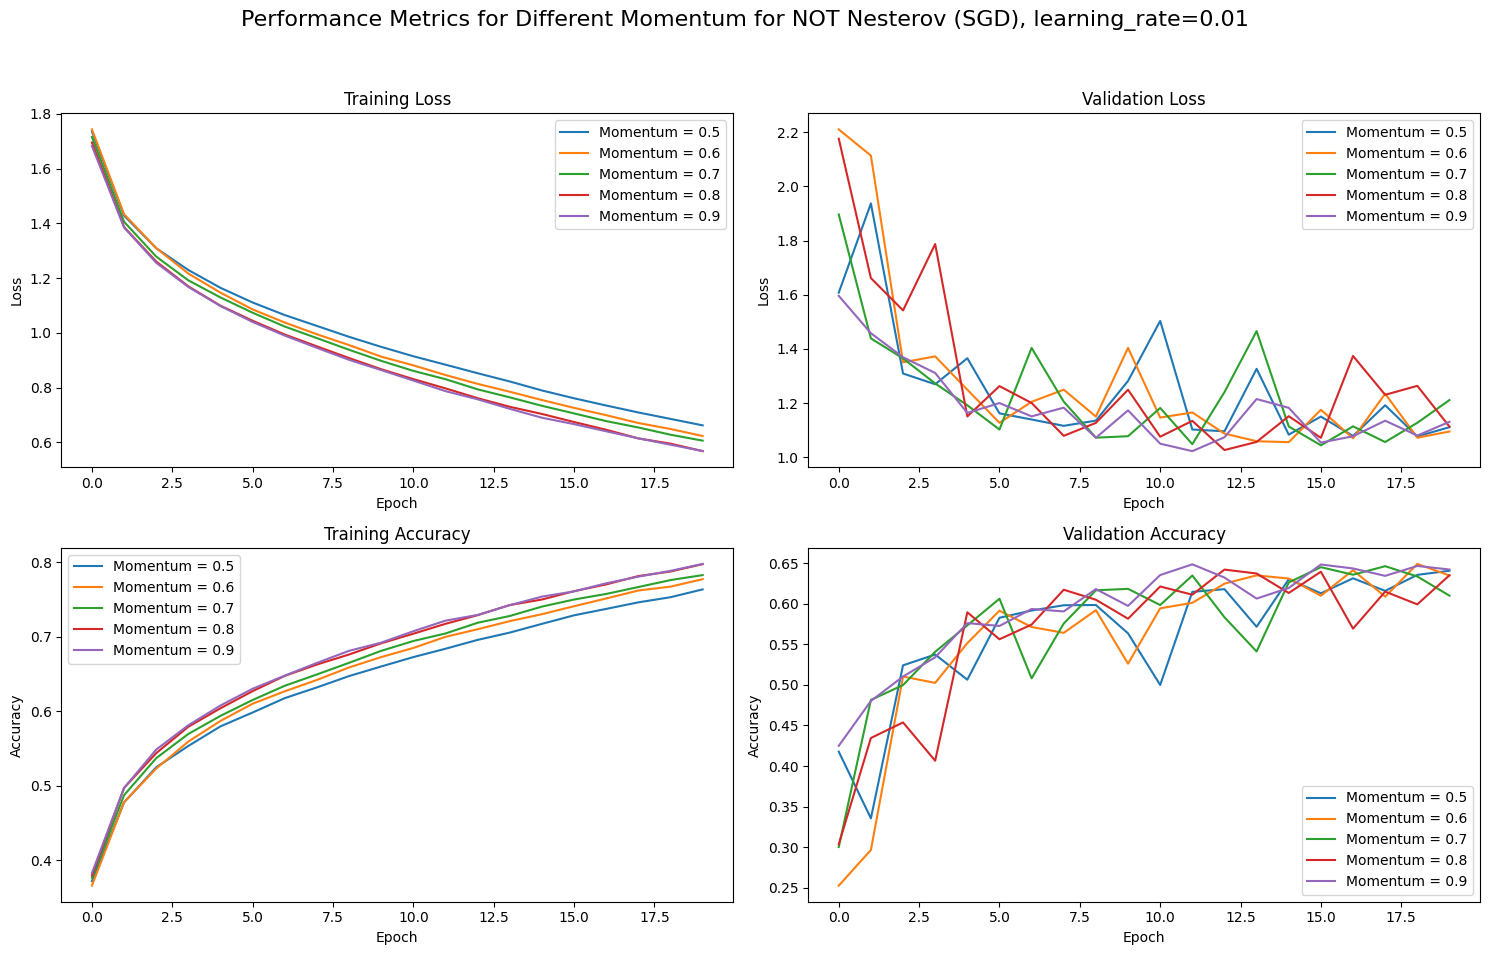

In [73]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting Training Loss
axs[0, 0].plot(losses_14, label='Momentum = 0.5')
axs[0, 0].plot(losses_15, label='Momentum = 0.6')
axs[0, 0].plot(losses_16, label='Momentum = 0.7')
axs[0, 0].plot(losses_17, label='Momentum = 0.8')
axs[0, 0].plot(losses_18, label='Momentum = 0.9')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plotting Validation Loss
axs[0, 1].plot(val_losses_14, label='Momentum = 0.5')
axs[0, 1].plot(val_losses_15, label='Momentum = 0.6')
axs[0, 1].plot(val_losses_16, label='Momentum = 0.7')
axs[0, 1].plot(val_losses_17, label='Momentum = 0.8')
axs[0, 1].plot(val_losses_18, label='Momentum = 0.9')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plotting Training Accuracy
axs[1, 0].plot(accuracies_14, label='Momentum = 0.5')
axs[1, 0].plot(accuracies_15, label='Momentum = 0.6')
axs[1, 0].plot(accuracies_16, label='Momentum = 0.7')
axs[1, 0].plot(accuracies_17, label='Momentum = 0.8')
axs[1, 0].plot(accuracies_18, label='Momentum = 0.9')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plotting Validation Accuracy
axs[1, 1].plot(val_accuracies_14, label='Momentum = 0.5')
axs[1, 1].plot(val_accuracies_15, label='Momentum = 0.6')
axs[1, 1].plot(val_accuracies_16, label='Momentum = 0.7')
axs[1, 1].plot(val_accuracies_17, label='Momentum = 0.8')
axs[1, 1].plot(val_accuracies_18, label='Momentum = 0.9')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout and set an overall title
fig.suptitle('Performance Metrics for Different Momentum for NOT Nesterov (SGD), learning_rate=0.01', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


### Nesterov learning rate = 0.1

In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0.5, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [11]:
# fit model
history_19 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.7173 - accuracy: 0.3700 - val_loss: 2.1230 - val_accuracy: 0.2880
Epoch 2/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.4341 - accuracy: 0.4816 - val_loss: 1.6779 - val_accuracy: 0.4058
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2959 - accuracy: 0.5355 - val_loss: 1.2411 - val_accuracy: 0.5597
Epoch 4/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.1995 - accuracy: 0.5740 - val_loss: 1.1930 - val_accuracy: 0.5759
Epoch 5/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.1216 - accuracy: 0.5992 - val_loss: 1.2300 - val_accuracy: 0.5614
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0552 - accuracy: 0.6236 - val_loss: 1.1450 - val_accuracy: 0.5929
Epoch 7/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.0010 - accuracy: 0.6443 - val_loss: 1.1399 -

In [12]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0.6, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [13]:
# fit model
history_20 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.7214 - accuracy: 0.3707 - val_loss: 1.8511 - val_accuracy: 0.3364
Epoch 2/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.4219 - accuracy: 0.4871 - val_loss: 1.5508 - val_accuracy: 0.4445
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2741 - accuracy: 0.5440 - val_loss: 1.2332 - val_accuracy: 0.5577
Epoch 4/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1703 - accuracy: 0.5827 - val_loss: 1.3005 - val_accuracy: 0.5400
Epoch 5/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0840 - accuracy: 0.6118 - val_loss: 1.1481 - val_accuracy: 0.5870
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0240 - accuracy: 0.6367 - val_loss: 1.1433 - val_accuracy: 0.5918
Epoch 7/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.9633 - accuracy: 0.6584 - val_loss: 1.2062 -

In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0.7, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [15]:
# fit model
history_21 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.7257 - accuracy: 0.3659 - val_loss: 1.9801 - val_accuracy: 0.2618
Epoch 2/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.4286 - accuracy: 0.4824 - val_loss: 1.3723 - val_accuracy: 0.5075
Epoch 3/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.2726 - accuracy: 0.5409 - val_loss: 1.4225 - val_accuracy: 0.4994
Epoch 4/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1674 - accuracy: 0.5807 - val_loss: 1.2386 - val_accuracy: 0.5580
Epoch 5/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0909 - accuracy: 0.6114 - val_loss: 1.1172 - val_accuracy: 0.5995
Epoch 6/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.0363 - accuracy: 0.6324 - val_loss: 1.0977 - val_accuracy: 0.6071
Epoch 7/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.9854 - accuracy: 0.6498 - val_loss: 1.0949 -

In [16]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0.8, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [17]:
# fit model
history_22 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 55s 39ms/step - loss: 1.7802 - accuracy: 0.3454 - val_loss: 1.6314 - val_accuracy: 0.4032
Epoch 2/20
1407/1407 [==============================] - 56s 40ms/step - loss: 1.4346 - accuracy: 0.4794 - val_loss: 1.4399 - val_accuracy: 0.4778
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2824 - accuracy: 0.5383 - val_loss: 1.2253 - val_accuracy: 0.5614
Epoch 4/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1932 - accuracy: 0.5735 - val_loss: 1.3161 - val_accuracy: 0.5232
Epoch 5/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1327 - accuracy: 0.5972 - val_loss: 1.1737 - val_accuracy: 0.5806
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0764 - accuracy: 0.6172 - val_loss: 1.2143 - val_accuracy: 0.5706
Epoch 7/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0320 - accuracy: 0.6361 - val_loss: 1.1629 -

In [18]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [19]:
# fit model
history_23 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 55s 39ms/step - loss: 1.8143 - accuracy: 0.3283 - val_loss: 1.7200 - val_accuracy: 0.3775
Epoch 2/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.4873 - accuracy: 0.4605 - val_loss: 1.5072 - val_accuracy: 0.4655
Epoch 3/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.3789 - accuracy: 0.5055 - val_loss: 1.3670 - val_accuracy: 0.5045
Epoch 4/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.3063 - accuracy: 0.5356 - val_loss: 1.4061 - val_accuracy: 0.4908
Epoch 5/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.2526 - accuracy: 0.5578 - val_loss: 1.2977 - val_accuracy: 0.5394
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.2138 - accuracy: 0.5712 - val_loss: 1.2185 - val_accuracy: 0.5699
Epoch 7/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1665 - accuracy: 0.5901 - val_loss: 1.2475 -

In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [21]:
# fit model
history_24 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.6772 - accuracy: 0.3850 - val_loss: 1.7402 - val_accuracy: 0.3594
Epoch 2/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.3898 - accuracy: 0.4957 - val_loss: 1.4464 - val_accuracy: 0.4835
Epoch 3/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.2517 - accuracy: 0.5494 - val_loss: 1.2447 - val_accuracy: 0.5580
Epoch 4/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1589 - accuracy: 0.5854 - val_loss: 1.8916 - val_accuracy: 0.4170
Epoch 5/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0905 - accuracy: 0.6113 - val_loss: 1.4918 - val_accuracy: 0.4747
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0253 - accuracy: 0.6355 - val_loss: 1.2392 - val_accuracy: 0.5609
Epoch 7/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.9742 - accuracy: 0.6535 - val_loss: 1.1461 -

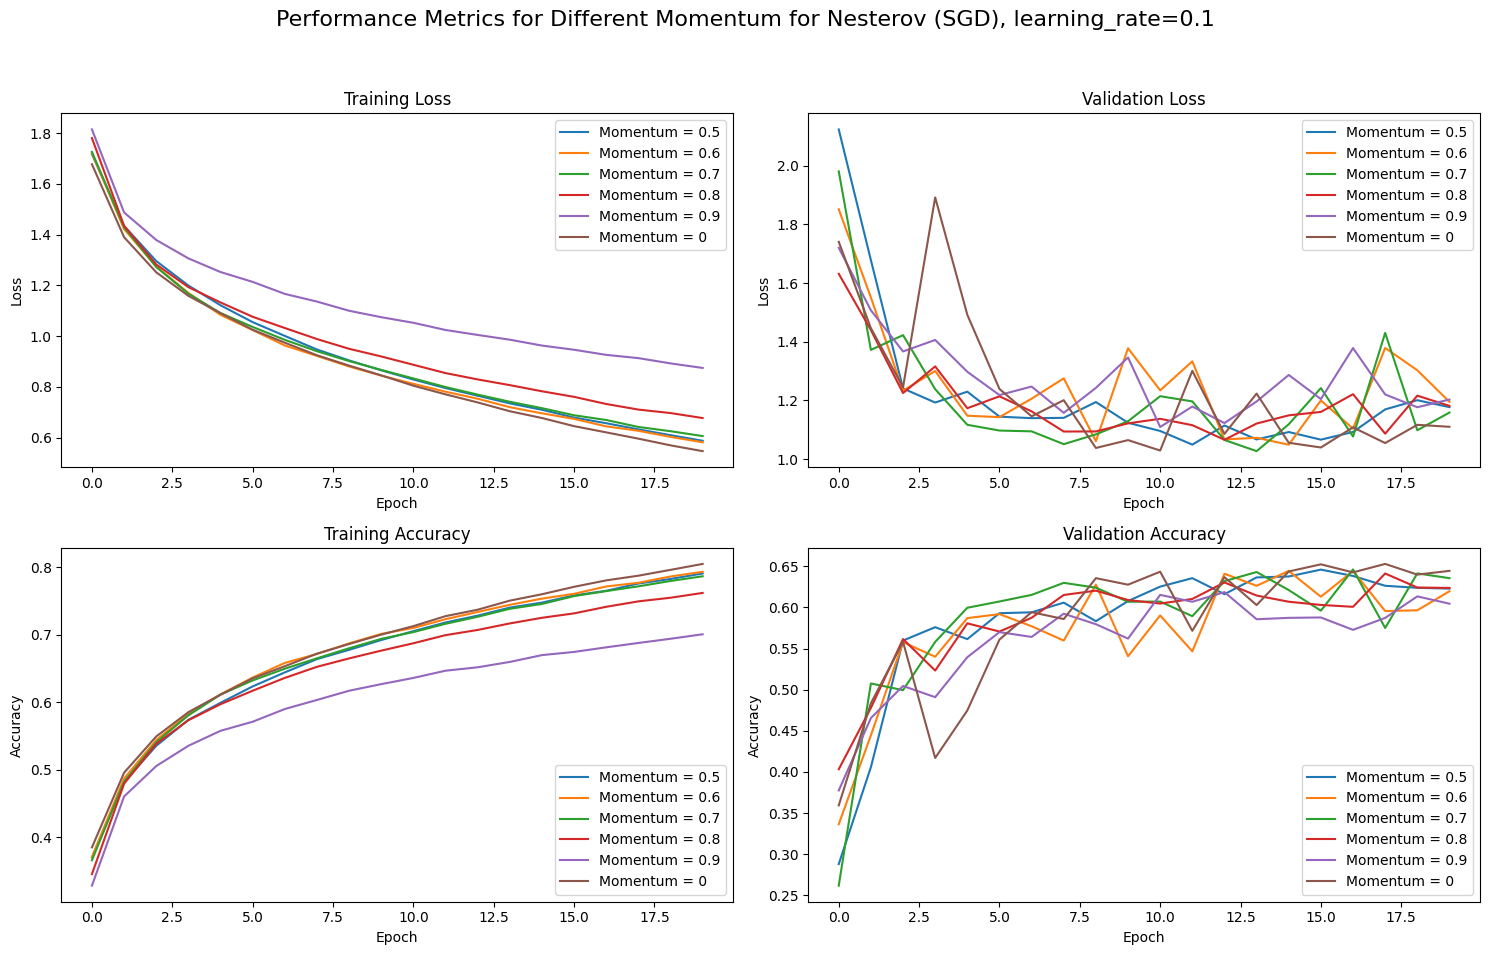

In [72]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting Training Loss
axs[0, 0].plot(history_19.history['loss'], label='Momentum = 0.5')
axs[0, 0].plot(history_20.history['loss'], label='Momentum = 0.6')
axs[0, 0].plot(history_21.history['loss'], label='Momentum = 0.7')
axs[0, 0].plot(history_22.history['loss'], label='Momentum = 0.8')
axs[0, 0].plot(history_23.history['loss'], label='Momentum = 0.9')
axs[0, 0].plot(history_24.history['loss'], label='Momentum = 0')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plotting Validation Loss
axs[0, 1].plot(history_19.history['val_loss'], label='Momentum = 0.5')
axs[0, 1].plot(history_20.history['val_loss'], label='Momentum = 0.6')
axs[0, 1].plot(history_21.history['val_loss'], label='Momentum = 0.7')
axs[0, 1].plot(history_22.history['val_loss'], label='Momentum = 0.8')
axs[0, 1].plot(history_23.history['val_loss'], label='Momentum = 0.9')
axs[0, 1].plot(history_24.history['val_loss'], label='Momentum = 0')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plotting Training Accuracy
axs[1, 0].plot(history_19.history['accuracy'], label='Momentum = 0.5')
axs[1, 0].plot(history_20.history['accuracy'], label='Momentum = 0.6')
axs[1, 0].plot(history_21.history['accuracy'], label='Momentum = 0.7')
axs[1, 0].plot(history_22.history['accuracy'], label='Momentum = 0.8')
axs[1, 0].plot(history_23.history['accuracy'], label='Momentum = 0.9')
axs[1, 0].plot(history_24.history['accuracy'], label='Momentum = 0')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plotting Validation Accuracy
axs[1, 1].plot(history_19.history['val_accuracy'], label='Momentum = 0.5')
axs[1, 1].plot(history_20.history['val_accuracy'], label='Momentum = 0.6')
axs[1, 1].plot(history_21.history['val_accuracy'], label='Momentum = 0.7')
axs[1, 1].plot(history_22.history['val_accuracy'], label='Momentum = 0.8')
axs[1, 1].plot(history_23.history['val_accuracy'], label='Momentum = 0.9')
axs[1, 1].plot(history_24.history['val_accuracy'], label='Momentum = 0')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout and set an overall title
fig.suptitle('Performance Metrics for Different Momentum for Nesterov (SGD), learning_rate=0.1', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


### Not nesterov, learning rate = 0.1

In [22]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0.5, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [23]:
# fit model
history_25 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 64s 45ms/step - loss: 1.7178 - accuracy: 0.3672 - val_loss: 1.9250 - val_accuracy: 0.3139
Epoch 2/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.4217 - accuracy: 0.4858 - val_loss: 1.5411 - val_accuracy: 0.4413
Epoch 3/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.2820 - accuracy: 0.5396 - val_loss: 1.5629 - val_accuracy: 0.4711
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1866 - accuracy: 0.5762 - val_loss: 1.3907 - val_accuracy: 0.5068
Epoch 5/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1077 - accuracy: 0.6035 - val_loss: 1.1491 - val_accuracy: 0.5954
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0453 - accuracy: 0.6269 - val_loss: 1.1942 - val_accuracy: 0.5689
Epoch 7/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9894 - accuracy: 0.6475 - val_loss: 1.1438 -

In [24]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0.6, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [25]:
# fit model
history_26 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.7104 - accuracy: 0.3729 - val_loss: 1.5886 - val_accuracy: 0.4227
Epoch 2/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.4229 - accuracy: 0.4839 - val_loss: 1.4811 - val_accuracy: 0.4597
Epoch 3/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.2755 - accuracy: 0.5426 - val_loss: 1.5142 - val_accuracy: 0.4701
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1677 - accuracy: 0.5834 - val_loss: 1.2132 - val_accuracy: 0.5716
Epoch 5/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.0859 - accuracy: 0.6152 - val_loss: 1.2284 - val_accuracy: 0.5653
Epoch 6/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.0186 - accuracy: 0.6382 - val_loss: 1.1393 - val_accuracy: 0.5931
Epoch 7/20
1407/1407 [==============================] - 53s 37ms/step - loss: 0.9620 - accuracy: 0.6589 - val_loss: 1.2266 -

In [26]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0.7, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [27]:
# fit model
history_27 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 55s 38ms/step - loss: 1.7458 - accuracy: 0.3588 - val_loss: 1.8934 - val_accuracy: 0.3502
Epoch 2/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.4353 - accuracy: 0.4812 - val_loss: 1.7509 - val_accuracy: 0.3859
Epoch 3/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.2782 - accuracy: 0.5408 - val_loss: 1.2426 - val_accuracy: 0.5573
Epoch 4/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.1716 - accuracy: 0.5813 - val_loss: 1.1938 - val_accuracy: 0.5732
Epoch 5/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0961 - accuracy: 0.6084 - val_loss: 1.3499 - val_accuracy: 0.5225
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0438 - accuracy: 0.6256 - val_loss: 1.1672 - val_accuracy: 0.5874
Epoch 7/20
1407/1407 [==============================] - 53s 38ms/step - loss: 0.9972 - accuracy: 0.6431 - val_loss: 1.1827 -

In [28]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0.8, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [29]:
# fit model
history_28 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.7885 - accuracy: 0.3408 - val_loss: 1.7781 - val_accuracy: 0.3585
Epoch 2/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.4334 - accuracy: 0.4808 - val_loss: 1.8893 - val_accuracy: 0.3564
Epoch 3/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.2723 - accuracy: 0.5429 - val_loss: 1.2916 - val_accuracy: 0.5288
Epoch 4/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.1832 - accuracy: 0.5780 - val_loss: 1.3580 - val_accuracy: 0.5236
Epoch 5/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.1182 - accuracy: 0.6030 - val_loss: 1.2244 - val_accuracy: 0.5673
Epoch 6/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.0618 - accuracy: 0.6239 - val_loss: 1.2014 - val_accuracy: 0.5686
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.0136 - accuracy: 0.6397 - val_loss: 1.1089 -

In [33]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [34]:
# fit model
history_29 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.8710 - accuracy: 0.3041 - val_loss: 1.6417 - val_accuracy: 0.3907
Epoch 2/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.5391 - accuracy: 0.4358 - val_loss: 1.8247 - val_accuracy: 0.4168
Epoch 3/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.4219 - accuracy: 0.4890 - val_loss: 1.4162 - val_accuracy: 0.4891
Epoch 4/20
1407/1407 [==============================] - 54s 38ms/step - loss: 1.3478 - accuracy: 0.5205 - val_loss: 1.8519 - val_accuracy: 0.3761
Epoch 5/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.3019 - accuracy: 0.5389 - val_loss: 1.3812 - val_accuracy: 0.5124
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.2556 - accuracy: 0.5574 - val_loss: 1.4250 - val_accuracy: 0.5086
Epoch 7/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.2161 - accuracy: 0.5743 - val_loss: 1.6313 -

In [36]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# SGD optimizer with typical parameters
sgd_optimizer = optimizers.SGD(learning_rate=0.1, momentum=0, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [37]:
# fit model
history_30 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 55s 38ms/step - loss: 1.6885 - accuracy: 0.3791 - val_loss: 1.5969 - val_accuracy: 0.4155
Epoch 2/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.3923 - accuracy: 0.4939 - val_loss: 1.4164 - val_accuracy: 0.4915
Epoch 3/20
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2656 - accuracy: 0.5441 - val_loss: 1.4451 - val_accuracy: 0.4948
Epoch 4/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1743 - accuracy: 0.5795 - val_loss: 1.3128 - val_accuracy: 0.5388
Epoch 5/20
1407/1407 [==============================] - 53s 37ms/step - loss: 1.1052 - accuracy: 0.6072 - val_loss: 1.1705 - val_accuracy: 0.5801
Epoch 6/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.0452 - accuracy: 0.6279 - val_loss: 1.1773 - val_accuracy: 0.5878
Epoch 7/20
1407/1407 [==============================] - 52s 37ms/step - loss: 0.9913 - accuracy: 0.6483 - val_loss: 1.1808 -

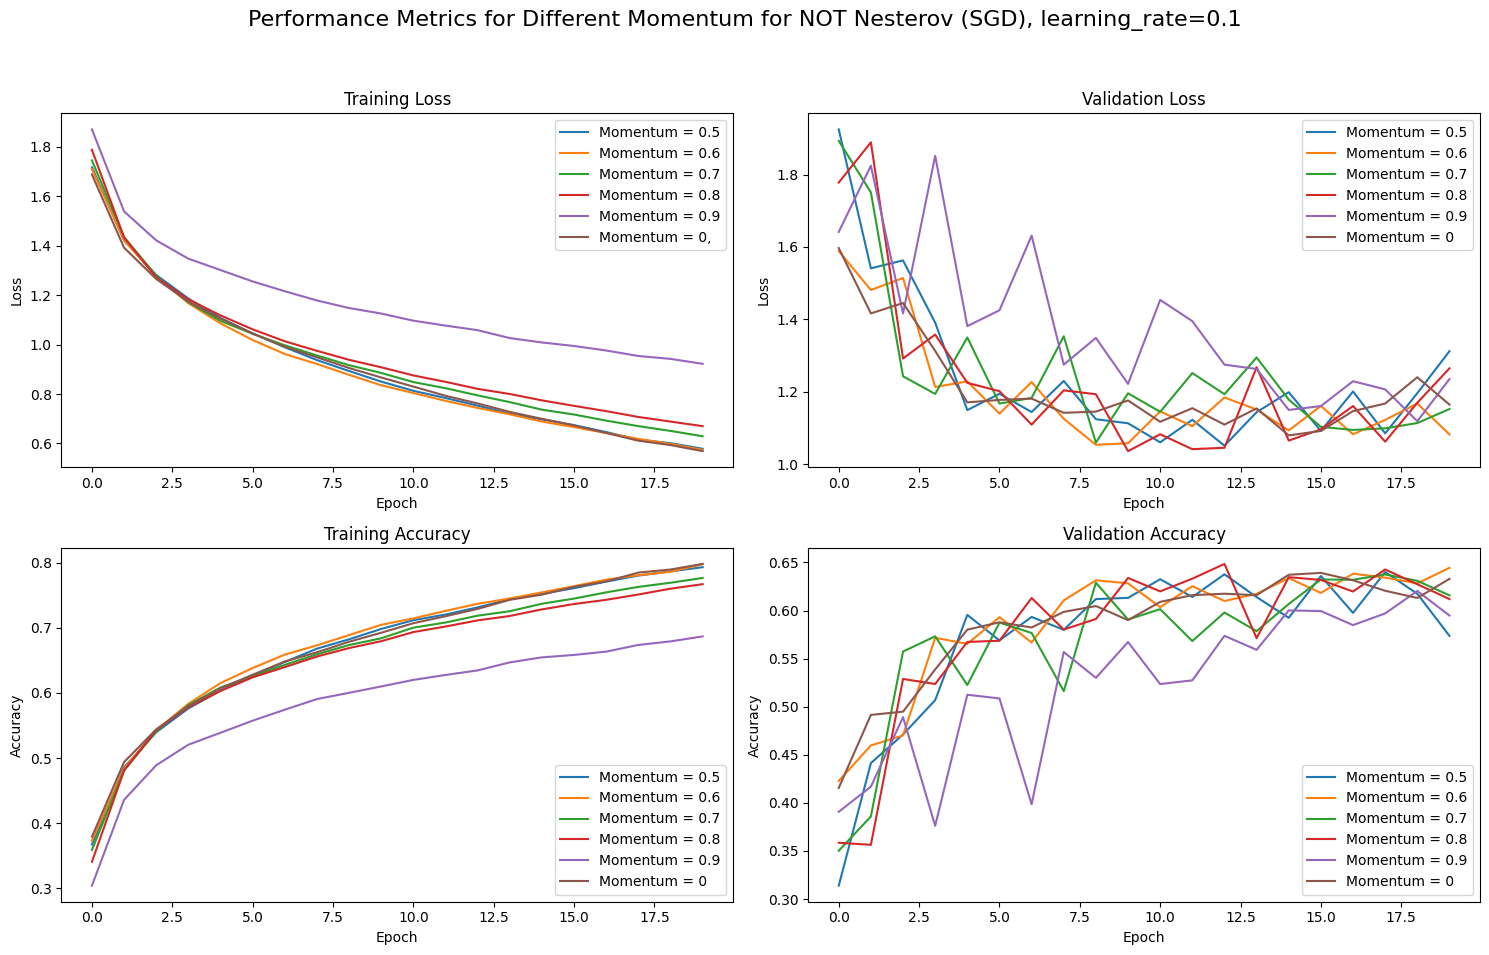

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting Training Loss
axs[0, 0].plot(history_25.history['loss'], label='Momentum = 0.5')
axs[0, 0].plot(history_26.history['loss'], label='Momentum = 0.6')
axs[0, 0].plot(history_27.history['loss'], label='Momentum = 0.7')
axs[0, 0].plot(history_28.history['loss'], label='Momentum = 0.8')
axs[0, 0].plot(history_29.history['loss'], label='Momentum = 0.9')
axs[0, 0].plot(history_30.history['loss'], label='Momentum = 0,')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plotting Validation Loss
axs[0, 1].plot(history_25.history['val_loss'], label='Momentum = 0.5')
axs[0, 1].plot(history_26.history['val_loss'], label='Momentum = 0.6')
axs[0, 1].plot(history_27.history['val_loss'], label='Momentum = 0.7')
axs[0, 1].plot(history_28.history['val_loss'], label='Momentum = 0.8')
axs[0, 1].plot(history_29.history['val_loss'], label='Momentum = 0.9')
axs[0, 1].plot(history_30.history['val_loss'], label='Momentum = 0')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plotting Training Accuracy
axs[1, 0].plot(history_25.history['accuracy'], label='Momentum = 0.5')
axs[1, 0].plot(history_26.history['accuracy'], label='Momentum = 0.6')
axs[1, 0].plot(history_27.history['accuracy'], label='Momentum = 0.7')
axs[1, 0].plot(history_28.history['accuracy'], label='Momentum = 0.8')
axs[1, 0].plot(history_29.history['accuracy'], label='Momentum = 0.9')
axs[1, 0].plot(history_30.history['accuracy'], label='Momentum = 0')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plotting Validation Accuracy
axs[1, 1].plot(history_25.history['val_accuracy'], label='Momentum = 0.5')
axs[1, 1].plot(history_26.history['val_accuracy'], label='Momentum = 0.6')
axs[1, 1].plot(history_27.history['val_accuracy'], label='Momentum = 0.7')
axs[1, 1].plot(history_28.history['val_accuracy'], label='Momentum = 0.8')
axs[1, 1].plot(history_29.history['val_accuracy'], label='Momentum = 0.9')
axs[1, 1].plot(history_30.history['val_accuracy'], label='Momentum = 0')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout and set an overall title
fig.suptitle('Performance Metrics for Different Momentum for NOT Nesterov (SGD), learning_rate=0.1', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
